# Analyse

Nous allons maintenant créer des clusters parmis les pays. 

Nous procéderons d'abord à une classification hiérarchique, puis nous formerons des clusters à l'aide de la méthode du Kmeans et nous ferons une ACP afin de visualiser les pays sur 2 et 3 dimensions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

import warnings

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
from factor_analyzer import calculate_kmo
from factor_analyzer import calculate_bartlett_sphericity

In [4]:
import plotly.express as px

In [5]:
folder = 'D:/Data_Analyst_Projet/Projet 9/Donnees/fichier analyse/'

In [6]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_row', 150)
#sns.set_palette('colorblind')

## Import fichiers

In [7]:
df_knn = pd.read_csv(folder+'pays_knn.csv')
df_knn.head()

pays  exportation_volaille  importation_volaille   production  \
0  Afrique du Sud             63,000.00            514,000.00 1,667,000.00   
1         Albanie                  0.00             38,000.00    13,000.00   
2         Algérie                  0.00              2,000.00   275,000.00   
3       Allemagne            646,000.00            842,000.00 1,514,000.00   
4          Angola                  0.00            277,000.00    42,000.00   

   volaille_consommée  taux_dependance  taux_autosuffisance  \
0        2,035,000.00             0.24                 0.76   
1           47,000.00             0.81                 0.28   
2          264,000.00             0.01                 0.99   
3        1,609,000.00             0.48                 0.50   
4          315,000.00             0.87                 0.13   

   proportion_volaille_nourriture  proportion_animaux_nourriture  \
0                            0.06                           0.12   
1                            0.01                           0.05   
2                            0.01                           0.03   
3                            0.02                           0.10   
4                            0.02                           0.07   

     population  accroissement_population_moyen_par_annee  \
0 57,009,756.00                                674,990.00   
1  2,884,169.00                                -12,973.84   
2 41,389,189.00                                588,745.95   
3 82,658,409.00                                 90,712.42   
4 29,816,766.00                                758,648.11   

   taux_accroissement_population_moyen  lpi                  pib  \
0                                 0.01 3.57   381,448,814,653.46   
1                                -0.00 2.56    13,019,689,336.69   
2                                 0.01 2.52   170,097,014,589.13   
3                                 0.00 4.13 3,690,849,152,517.65   
4                                 0.03 2.24    68,972,769,395.63   

   taux_droit_douane  quantite_conteneurs_par_annee  cout_production_volaille  \
0               4.44                   4,563,618.00                  2,016.60   
1               1.43                     118,270.00                  2,072.14   
2               9.28                   1,725,238.00                  2,180.70   
3               1.81                  15,169,595.00                  1,459.50   
4               8.52                     570,200.00                  2,176.24   

   taux_population_urbaine  stabilite_politique  pib_par_habitant  
0                     0.66                -0.28          6,690.94  
1                     0.60                 0.38          4,514.19  
2                     0.72                -0.92          4,109.70  
3                     0.77                 0.59         44,651.83  
4                     0.65                -0.33          2,313.22

In [8]:
df_sans_knn = pd.read_csv(folder+'pays.csv')
df_sans_knn.head()

pays  exportation_volaille  importation_volaille   production  \
0  Afrique du Sud             63,000.00            514,000.00 1,667,000.00   
1         Albanie                  0.00             38,000.00    13,000.00   
2         Algérie                  0.00              2,000.00   275,000.00   
3       Allemagne            646,000.00            842,000.00 1,514,000.00   
4          Angola                  0.00            277,000.00    42,000.00   

   volaille_consommée  taux_dependance  taux_autosuffisance  \
0        2,035,000.00             0.24                 0.76   
1           47,000.00             0.81                 0.28   
2          264,000.00             0.01                 0.99   
3        1,609,000.00             0.48                 0.50   
4          315,000.00             0.87                 0.13   

   proportion_volaille_nourriture  proportion_animaux_nourriture  \
0                            0.06                           0.12   
1                            0.01                           0.05   
2                            0.01                           0.03   
3                            0.02                           0.10   
4                            0.02                           0.07   

     population  accroissement_population_moyen_par_annee  \
0 57,009,756.00                                674,990.00   
1  2,884,169.00                                -12,973.84   
2 41,389,189.00                                588,745.95   
3 82,658,409.00                                 90,712.42   
4 29,816,766.00                                758,648.11   

   taux_accroissement_population_moyen  lpi                  pib  \
0                                 0.01 3.57   381,448,814,653.46   
1                                -0.00 2.56    13,019,689,336.69   
2                                 0.01 2.52   170,097,014,589.13   
3                                 0.00 4.13 3,690,849,152,517.65   
4                                 0.03 2.24    68,972,769,395.63   

   taux_droit_douane  taux_population_urbaine  stabilite_politique  \
0               4.44                     0.66                -0.28   
1               1.43                     0.60                 0.38   
2               9.28                     0.72                -0.92   
3               1.81                     0.77                 0.59   
4               8.52                     0.65                -0.33   

   pib_par_habitant  
0          6,690.94  
1          4,514.19  
2          4,109.70  
3         44,651.83  
4          2,313.22

In [9]:
# pour cette itération df = df_knn
df = df_knn

In [10]:
df.shape

(128, 20)

In [11]:
# on enlève les outliers
outliers = df[df['pays'].isin(['Chine, continentale', 'Brésil', 'Inde', "États-Unis d'Amérique"])]
df = df.drop(outliers.index).reset_index(drop=True)

In [12]:
# on garde uniquement les données numériques pour l'analyse 
X = df.drop(columns='pays')

In [13]:
# pays dans une variable array
pays = df['pays'].values

In [14]:
# indicateur dans une variable array
variables = X.columns.values

In [15]:
X.shape[0]

128

## Classification hiérarchique

Les différences entre les individus peut se calculer avec la distance euclidienne :
la racine de la somme des différences au carré.

Lors d'une classification hiérarchique, au départ il y a autant de clusters que d'individus.

Ensuite, on regroupe 2 à 2 les individus qui ont la plus petite distance euclidienne, jusqu'à qu'il y est un seul cluster.

In [16]:
# On centre et on réduit l'échantillon pour s'assurer que chaque variable aura la même incidence sur la classification
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

La méthode de classification hiérarchique s'effectue avec peu de données (50 ou moins).

Nous allons donc prendre un échantillon aléatoire et effectuer le mélange plusieurs fois.

In [17]:
# df standardisé
df_X_scaled = pd.DataFrame(X_scaled, columns=variables, index=pays)
df_X_scaled.head()

exportation_volaille  importation_volaille  production  \
Afrique du Sud                 -0.05                  1.97        1.54   
Albanie                        -0.36                 -0.34       -0.61   
Algérie                        -0.36                 -0.52       -0.27   
Allemagne                       2.83                  3.57        1.34   
Angola                         -0.36                  0.82       -0.57   

                volaille_consommée  taux_dependance  taux_autosuffisance  \
Afrique du Sud                2.08            -0.37                 0.23   
Albanie                      -0.56             0.78                -0.73   
Algérie                      -0.27            -0.84                 0.71   
Allemagne                     1.51             0.12                -0.28   
Angola                       -0.21             0.90                -1.02   

                proportion_volaille_nourriture  proportion_animaux_nourriture  \
Afrique du Sud                            1.42                           0.51   
Albanie                                  -0.84                          -1.18   
Algérie                                  -1.06                          -1.54   
Allemagne                                -0.50                           0.09   
Angola                                   -0.60                          -0.66   

                population  accroissement_population_moyen_par_annee  \
Afrique du Sud        0.74                                      0.66   
Albanie              -0.55                                     -0.50   
Algérie               0.37                                      0.52   
Allemagne             1.35                                     -0.32   
Angola                0.09                                      0.80   

                taux_accroissement_population_moyen   lpi   pib  \
Afrique du Sud                                 0.23  1.15  0.08   
Albanie                                       -1.52 -0.80 -0.45   
Algérie                                        0.48 -0.87 -0.23   
Allemagne                                     -0.92  2.24  4.83   
Angola                                         1.69 -1.41 -0.37   

                taux_droit_douane  quantite_conteneurs_par_annee  \
Afrique du Sud              -0.16                           0.25   
Albanie                     -0.89                          -0.60   
Algérie                      1.02                          -0.29   
Allemagne                   -0.79                           2.28   
Angola                       0.83                          -0.51   

                cout_production_volaille  taux_population_urbaine  \
Afrique du Sud                     -0.29                     0.12   
Albanie                            -0.20                    -0.13   
Algérie                            -0.02                     0.43   
Allemagne                          -1.23                     0.66   
Angola                             -0.02                     0.08   

                stabilite_politique  pib_par_habitant  
Afrique du Sud                -0.32             -0.49  
Albanie                        0.42             -0.60  
Algérie                       -1.04             -0.62  
Allemagne                      0.65              1.35  
Angola                        -0.38             -0.71

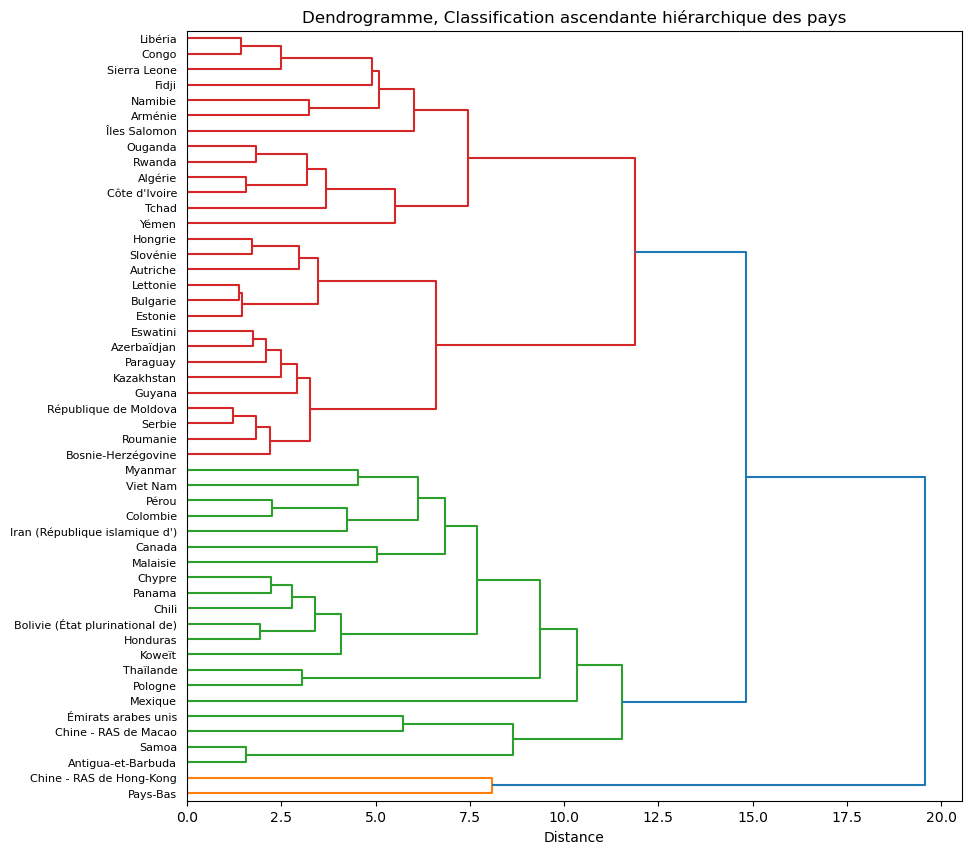

In [18]:
# faire random sample echantillon de 30 pays
# faire plusieurs itération pour valider les clusters
echantillon = df_X_scaled.sample(50)


# mesure les liens entre les clusters avec la méthode de ward
# chaque fois que 2 clusters sont regroupés, cherche à minimiser l'inertie intraclasse

Z = linkage(echantillon, 'ward')


# création du dendogramme
plt.figure(figsize=(10,10))
dendrogram(Z, p=echantillon.shape[0], truncate_mode='lastp', distance_sort='ascending',
           orientation='right', labels=echantillon.index)
plt.title("Dendrogramme, Classification ascendante hiérarchique des pays")
plt.xlabel('Distance')
plt.show();

In [19]:
Z

array([[18.        , 36.        ,  1.21226646,  2.        ],
       [20.        , 40.        ,  1.36836146,  2.        ],
       [26.        , 29.        ,  1.42148635,  2.        ],
       [11.        , 51.        ,  1.46192478,  3.        ],
       [35.        , 48.        ,  1.56855692,  2.        ],
       [14.        , 27.        ,  1.57322714,  2.        ],
       [ 5.        , 33.        ,  1.73465801,  2.        ],
       [21.        , 47.        ,  1.74408508,  2.        ],
       [45.        , 50.        ,  1.82357302,  3.        ],
       [32.        , 41.        ,  1.84158283,  2.        ],
       [34.        , 43.        ,  1.92654145,  2.        ],
       [19.        , 57.        ,  2.08773452,  3.        ],
       [13.        , 58.        ,  2.19307814,  4.        ],
       [24.        , 42.        ,  2.21749951,  2.        ],
       [22.        , 23.        ,  2.26316614,  2.        ],
       [10.        , 52.        ,  2.48085339,  3.        ],
       [ 6.        , 61.

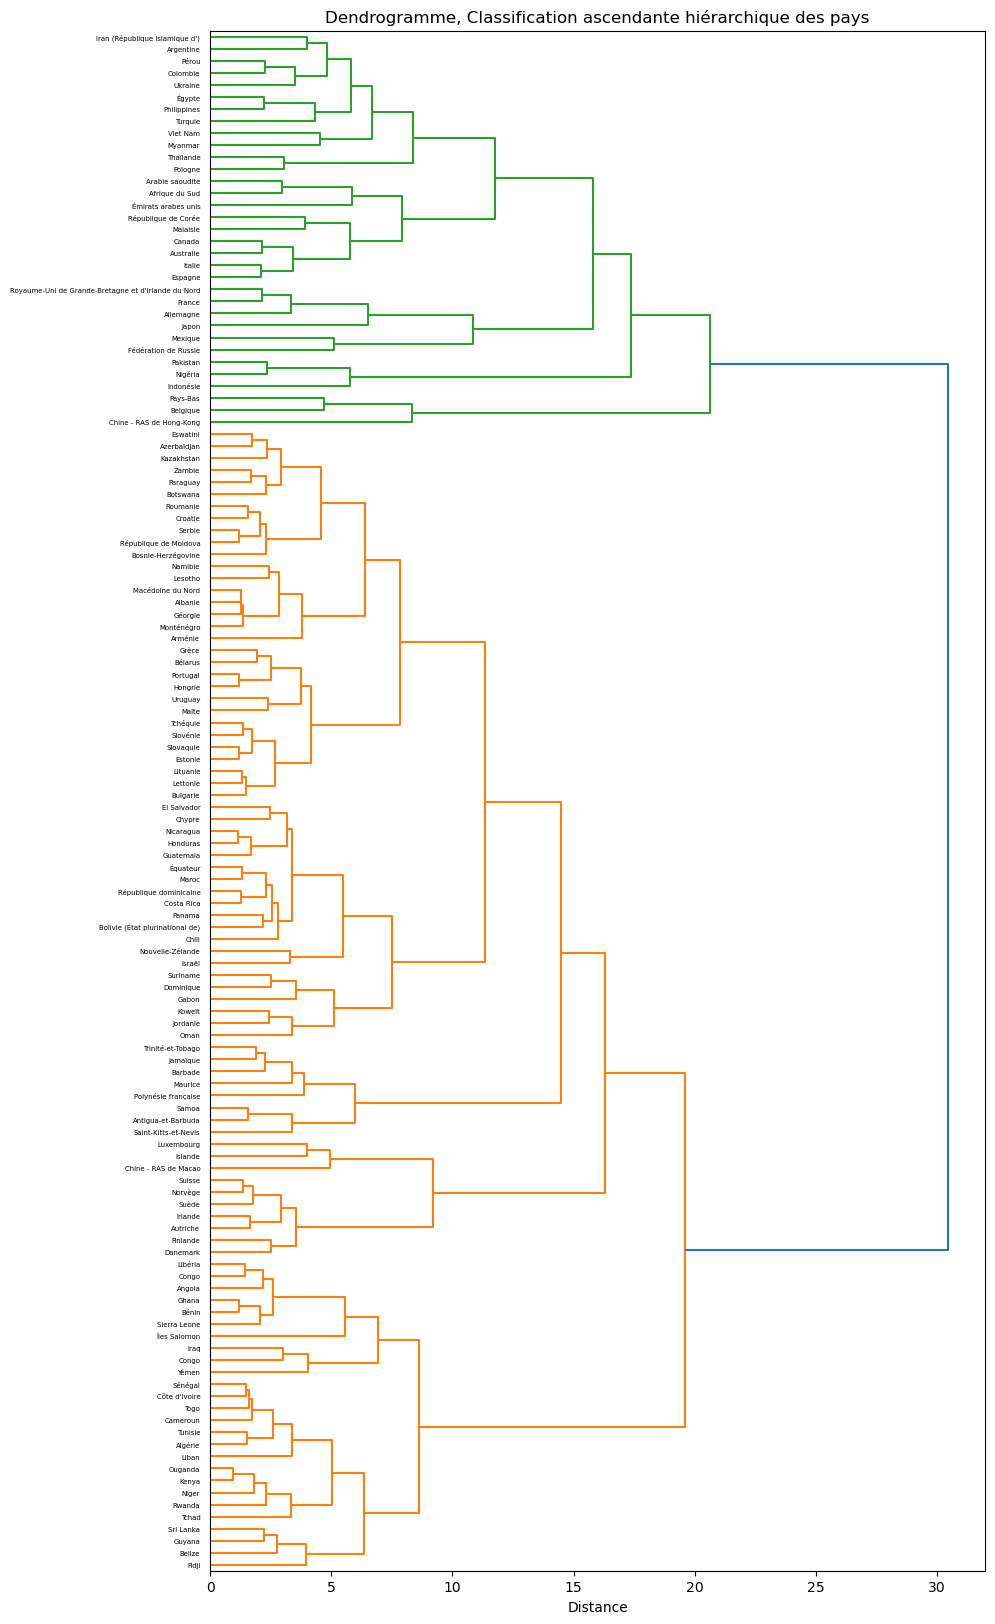

In [20]:
# Dendogramme global

Z = linkage(X_scaled, 'ward')


# création du dendogramme
plt.figure(figsize=(10,20))
dendrogram(Z, p=X_scaled.shape[0], truncate_mode='lastp', distance_sort='ascending',
           orientation='right', labels=pays)
plt.title("Dendrogramme, Classification ascendante hiérarchique des pays")
plt.xlabel('Distance')
plt.show();

In [21]:
Z

array([[ 62.        ,  85.        ,   0.93961931,   2.        ],
       [ 49.        ,  79.        ,   1.14153985,   2.        ],
       [ 37.        , 105.        ,   1.1903511 ,   2.        ],
       [ 50.        ,  93.        ,   1.19415754,   2.        ],
       [ 20.        ,  44.        ,   1.19898098,   2.        ],
       [ 99.        , 103.        ,   1.21226646,   2.        ],
       [  1.        ,  70.        ,   1.25959499,   2.        ],
       [ 48.        , 134.        ,   1.26964741,   3.        ],
       [ 30.        , 100.        ,   1.28234536,   2.        ],
       [ 65.        ,  68.        ,   1.30925244,   2.        ],
       [ 73.        , 126.        ,   1.31866709,   2.        ],
       [ 82.        , 108.        ,   1.34341113,   2.        ],
       [ 76.        , 135.        ,   1.36849814,   4.        ],
       [106.        , 113.        ,   1.37739923,   2.        ],
       [ 28.        ,  67.        ,   1.42148635,   2.        ],
       [ 18.        , 137

In [22]:
# création de la classification
cah = AgglomerativeClustering(n_clusters=4, linkage='ward')

cah = cah.fit(X_scaled)

In [23]:
# création des clusters
clusters_cah = cah.labels_

df['clusters_cah'] = clusters_cah

La classification hiérarchique fait ressortir 3 à 4 clusters. On divisera l'échantillon en 4 clusters pour cette itération.

## Kmeans

#### Méthode du coude avec standardisation

Text(0.5, 0, 'Nombre de clusters')

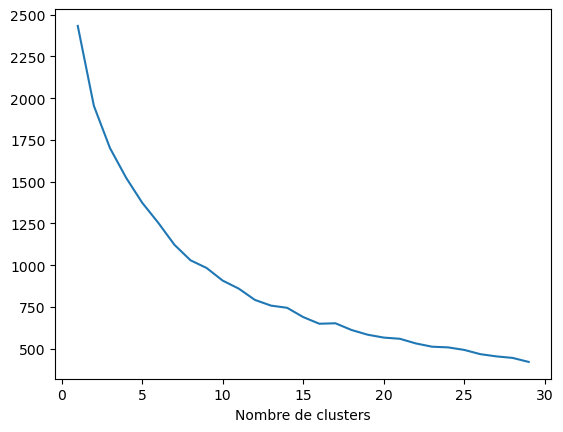

In [24]:
# méthode du coude pour déterminer le nombre de clusters le plus pertinents
warnings.simplefilter('ignore')

liste_clusters = []

for n in range(1,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X_scaled)
    liste_clusters.append(kmeans.inertia_)

plt.plot(range(1,30), liste_clusters)
plt.xlabel('Nombre de clusters')

Avec standardisation pas de coude visible.

#### Méthode du coude sans standardisation

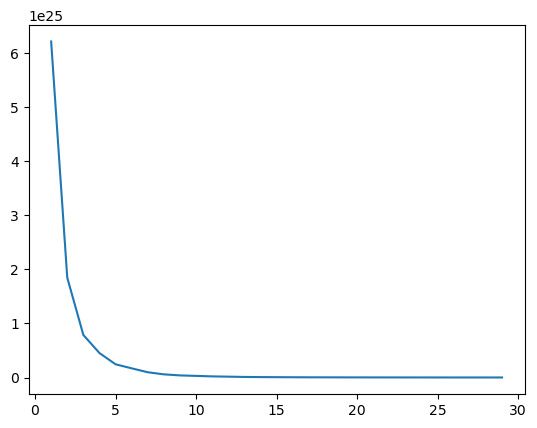

In [25]:
# méthode du coude pour déterminer le nombre de clusters le plus pertinents
warnings.simplefilter('ignore')

liste_clusters = []

for n in range(1,30):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    liste_clusters.append(kmeans.inertia_)

plt.plot(range(1,30), liste_clusters)

Sans standardisation, on peut voir un coude pour 2, 3, 4 et 5 clusters.

Pour la première itération on prendra 4 clusters.

In [26]:
# création de l'estimateur

kmeans = KMeans(n_clusters=4)

kmeans = kmeans.fit(X_scaled)

In [27]:
# coordonnées des centroides

centroides = kmeans.cluster_centers_

In [28]:
# clusters de l'echantillon

clusters_kmeans = kmeans.labels_
df['clusters_kmeans']=clusters_kmeans

## PCA, Analyse en composantes principales

### Evaluation de la qualité de la PCA

On va mesurer l'utilité et la qualité de l'analyse en composantes principales grâce au KMO.

Le KMO indique si les variables sont assez corrélées pour faire une ACP. Un score élevé (proche de 1) indique qu'une analyse factorielle peut être utile.

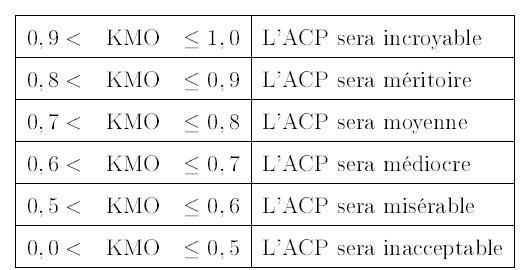

In [29]:
X

exportation_volaille  importation_volaille   production  \
0               63,000.00            514,000.00 1,667,000.00   
1                    0.00             38,000.00    13,000.00   
2                    0.00              2,000.00   275,000.00   
3              646,000.00            842,000.00 1,514,000.00   
4                    0.00            277,000.00    42,000.00   
5                    0.00              7,000.00         0.00   
6               10,000.00            722,000.00   616,000.00   
7              207,000.00              8,000.00 2,161,000.00   
8                    0.00             35,000.00    11,000.00   
9               42,000.00             16,000.00 1,269,000.00   
10              78,000.00            110,000.00   148,000.00   
11                   0.00             27,000.00   104,000.00   
12                   0.00              2,000.00    15,000.00   
13             656,000.00            338,000.00   463,000.00   
14                   0.00                  0.00    20,000.00   
15               1,000.00              1,000.00   533,000.00   
16               8,000.00             10,000.00    61,000.00   
17                   0.00              3,000.00     5,000.00   
18              45,000.00            108,000.00   107,000.00   
19             152,000.00             21,000.00   463,000.00   
20                   0.00            123,000.00    18,000.00   
21                   0.00                  0.00    81,000.00   
22             163,000.00            182,000.00 1,417,000.00   
23             115,000.00            155,000.00   712,000.00   
24             663,000.00            907,000.00    24,000.00   
25                   0.00             23,000.00     3,000.00   
26               1,000.00             14,000.00    25,000.00   
27               2,000.00             78,000.00 1,564,000.00   
28                   0.00            104,000.00     7,000.00   
29                   0.00            104,000.00     7,000.00   
30               3,000.00             17,000.00   133,000.00   
31              17,000.00             24,000.00    61,000.00   
32                   0.00              7,000.00    58,000.00   
33             139,000.00            133,000.00   173,000.00   
34                   0.00              4,000.00         0.00   
35               2,000.00             16,000.00   136,000.00   
36             212,000.00            205,000.00 1,515,000.00   
37              11,000.00             21,000.00    20,000.00   
38                   0.00              2,000.00     6,000.00   
39                   0.00              3,000.00    23,000.00   
40              12,000.00             16,000.00   129,000.00   
41             501,000.00            506,000.00 1,750,000.00   
42             115,000.00            226,000.00 4,444,000.00   
43                   0.00             76,000.00     4,000.00   
44                   0.00            151,000.00    60,000.00   
45              29,000.00             79,000.00   246,000.00   
46               7,000.00            129,000.00   235,000.00   
47                   0.00                  0.00    31,000.00   
48               5,000.00             51,000.00    22,000.00   
49               1,000.00             12,000.00   193,000.00   
50             210,000.00             58,000.00   493,000.00   
51                   0.00              1,000.00 2,301,000.00   
52              45,000.00              6,000.00 2,174,000.00   
53                   0.00            470,000.00    96,000.00   
54              93,000.00             99,000.00   110,000.00   
55                   0.00              2,000.00    10,000.00   
56               3,000.00                  0.00   629,000.00   
57             183,000.00             97,000.00 1,315,000.00   
58               1,000.00             31,000.00   128,000.00   
59              10,000.00          1,069,000.00 2,215,000.00   
60              10,000.00             64,000.00   210,000.00   
61               6,000.00            

In [30]:
calculate_kmo(X)

(array([0.43026354, 0.56757027, 0.56509774, 0.56391485, 0.59045804,
        0.57342427, 0.45808409, 0.61051364, 0.63523897, 0.52577054,
        0.5379492 , 0.75286271, 0.69594846, 0.72161268, 0.7720871 ,
        0.56583684, 0.8309431 , 0.87661292, 0.62502219]),
 0.6232632758737701)

Dans cette situation, la PCA est indiquée "misérable". 

On va améliorer le KMO en enlevant des variables.

#### Test de sphéricité de Bartlett
Teste l'hypothèse selon laquelle votre matrice de corrélation est une matrice d'identité, ce qui indiquerait que les variables ne sont pas liées et donc ne conviennent pas pour la détection de structure. Des valeurs faibles (inférieures à 0,05) du niveau de signification indiquent qu'une analyse factorielle peut être utile avec vos données.

In [31]:
from factor_analyzer import calculate_bartlett_sphericity

In [32]:
calculate_bartlett_sphericity(X)

(2274.910960919125, 0.0)

La p-value est inférieur à 0.05, les test est significatif, l'analyse factorielle peut être utile aux données.

### Tentative d'amélioration de la PCA

Plusieurs possibilités pour améliorer la PCA :
- Analyser le KMO par variable et rejeter les variables qui ont un KMO faible (inférieur ou égale à 0.5)
- Analyser les 'communalities' de chaque variables et enlever les variables qui ont une communalitie faible (inférieur ou égale à 0.3)
- Enlever les variables les moins corrélées avec les autres variables 
- Normaliser

Pour rappel, les communalities sont les pourcentage de variation expliquée par chaque facteur, on va enlever les variables qui expliquent le moins de variation.

Les propositions pour améliorer le KMO global proviennent de 2 sources :
- https://spss.espaceweb.usherbrooke.ca/procedure-spss-5/
- Le livre Consis_Statistique consultable ci-dessous à partir de la page 651 chapitre sur l'ACP.

In [33]:
from IPython.display import IFrame
IFrame("Consis_Statistique.pdf", width=600, height=300)

#### KMO par variables

In [34]:
kmo_variable = pd.DataFrame(data=calculate_kmo(X)[0], index=X.columns.values, columns=['KMO'])
kmo_variable.sort_values('KMO', ascending = False)

KMO
stabilite_politique                      0.88
taux_population_urbaine                  0.83
quantite_conteneurs_par_annee            0.77
lpi                                      0.75
taux_droit_douane                        0.72
pib                                      0.70
population                               0.64
pib_par_habitant                         0.63
proportion_animaux_nourriture            0.61
taux_dependance                          0.59
taux_autosuffisance                      0.57
importation_volaille                     0.57
cout_production_volaille                 0.57
production                               0.57
volaille_consommée                       0.56
taux_accroissement_population_moyen      0.54
accroissement_population_moyen_par_annee 0.53
proportion_volaille_nourriture           0.46
exportation_volaille                     0.43

On pourra par exemple conserver les variables dont le KMO est supérieur ou égale à 0,5.

##### On enlève les variables qui ont un KMO faible

In [35]:
# test kmo > 0.5
# on garde les variables dont le kmo est > 0.5
kmo_col = kmo_variable[kmo_variable['KMO'] > 0.52].index.values
kmo_col

array(['importation_volaille', 'production', 'volaille_consommée',
       'taux_dependance', 'taux_autosuffisance',
       'proportion_animaux_nourriture', 'population',
       'accroissement_population_moyen_par_annee',
       'taux_accroissement_population_moyen', 'lpi', 'pib',
       'taux_droit_douane', 'quantite_conteneurs_par_annee',
       'cout_production_volaille', 'taux_population_urbaine',
       'stabilite_politique', 'pib_par_habitant'], dtype=object)

In [36]:
# variables enlevées par la condition ci-dessus
kmo_variable[~(kmo_variable['KMO'] > 0.52)].index.values

array(['exportation_volaille', 'proportion_volaille_nourriture'],
      dtype=object)

In [37]:
calculate_kmo(X[kmo_col])

(array([0.65242057, 0.67901746, 0.6829028 , 0.62622978, 0.60145789,
        0.72458682, 0.62704774, 0.51311896, 0.53129015, 0.70423466,
        0.69709944, 0.76020225, 0.75890965, 0.55284629, 0.86882745,
        0.85914658, 0.6259248 ]),
 0.6732333581652811)

Le KMO est de 0.71, ce qui est 'moyen' mais acceptable, on va voir si on peut encore l'améliorer.
D'autres sources affirment qu'un KMO est acceptable à partir de 0,6.

In [38]:
X[kmo_col].shape

(128, 17)

##### Calcul des communalities

In [39]:
from factor_analyzer import FactorAnalyzer

In [40]:
fa = FactorAnalyzer(rotation='varimax', n_factors=3)

fa.fit(X)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [41]:
df_communalities = pd.DataFrame(fa.get_communalities(), index=X.columns, columns=['communalities'])
df_communalities

communalities
exportation_volaille                               0.29
importation_volaille                               0.63
production                                         0.78
volaille_consommée                                 0.78
taux_dependance                                    0.86
taux_autosuffisance                                0.97
proportion_volaille_nourriture                     0.08
proportion_animaux_nourriture                      0.29
population                                         0.82
accroissement_population_moyen_par_annee           0.51
taux_accroissement_population_moyen                0.21
lpi                                                0.78
pib                                                0.66
taux_droit_douane                                  0.38
quantite_conteneurs_par_annee                      0.53
cout_production_volaille                           0.09
taux_population_urbaine                            0.41
stabilite_politique                                0.63
pib_par_habitant                                   0.54

In [42]:
# on garde les variables dont les communalities sont supérieurs à 0,3
variables_communalities = df_communalities[df_communalities['communalities']>0.35].index.values
variables_communalities

array(['importation_volaille', 'production', 'volaille_consommée',
       'taux_dependance', 'taux_autosuffisance', 'population',
       'accroissement_population_moyen_par_annee', 'lpi', 'pib',
       'taux_droit_douane', 'quantite_conteneurs_par_annee',
       'taux_population_urbaine', 'stabilite_politique',
       'pib_par_habitant'], dtype=object)

In [43]:
len(variables_communalities)

14

In [44]:
df_communalities[~(df_communalities['communalities']>0.35)].index.values

array(['exportation_volaille', 'proportion_volaille_nourriture',
       'proportion_animaux_nourriture',
       'taux_accroissement_population_moyen', 'cout_production_volaille'],
      dtype=object)

In [45]:
calculate_kmo(X[variables_communalities])

(array([0.62856716, 0.6579885 , 0.67034088, 0.60812297, 0.58190933,
        0.63310454, 0.48672873, 0.69805735, 0.69776951, 0.67992386,
        0.86128819, 0.87217083, 0.87196351, 0.67359283]),
 0.6730026731832315)

In [46]:
df_communalities.shape

(19, 1)

##### On enlève les variables qui sont corrélées à aucune autre variable

<AxesSubplot:>

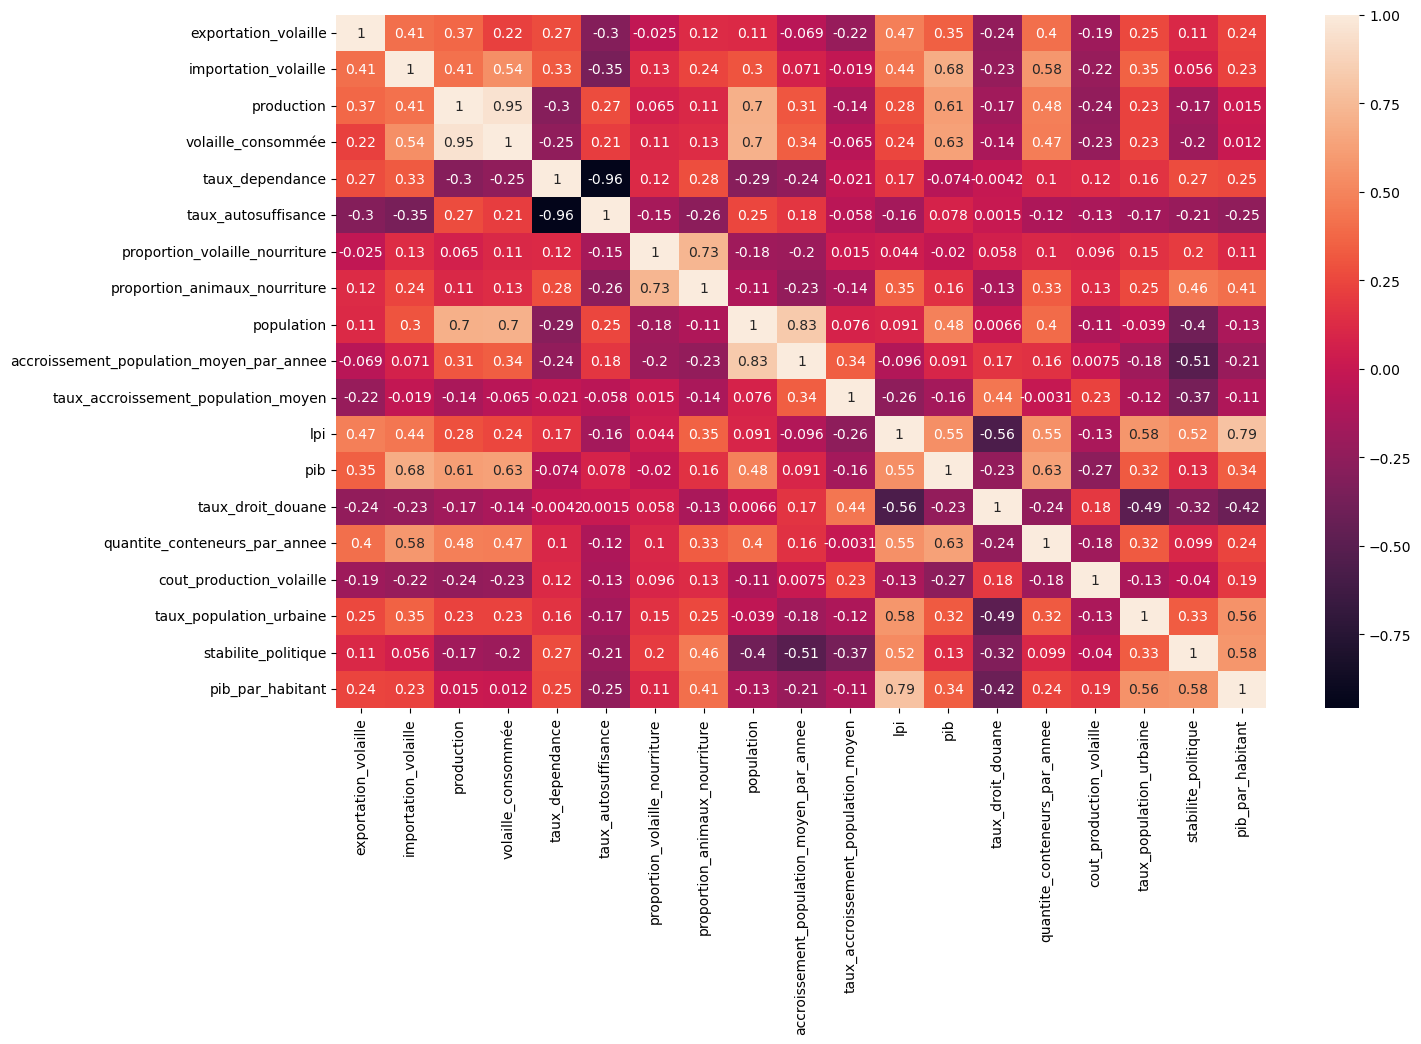

In [47]:
plt.figure(figsize=(15,9))
sns.heatmap(X.corr(), annot=True)

In [48]:
cor = X.corr()

In [49]:
# j'identifie les variables qui sont peu corrélées avec les autres
cor_count = (cor[(cor > 0.5)|(cor < -0.5)].count())
cor_count

exportation_volaille                        1
importation_volaille                        4
production                                  4
volaille_consommée                          5
taux_dependance                             2
taux_autosuffisance                         2
proportion_volaille_nourriture              2
proportion_animaux_nourriture               2
population                                  4
accroissement_population_moyen_par_annee    3
taux_accroissement_population_moyen         1
lpi                                         7
pib                                         6
taux_droit_douane                           2
quantite_conteneurs_par_annee               4
cout_production_volaille                    1
taux_population_urbaine                     3
stabilite_politique                         4
pib_par_habitant                            4
dtype: int64

In [50]:
cor_count_cond = cor_count > 2
cor_count_cond

exportation_volaille                        False
importation_volaille                         True
production                                   True
volaille_consommée                           True
taux_dependance                             False
taux_autosuffisance                         False
proportion_volaille_nourriture              False
proportion_animaux_nourriture               False
population                                   True
accroissement_population_moyen_par_annee     True
taux_accroissement_population_moyen         False
lpi                                          True
pib                                          True
taux_droit_douane                           False
quantite_conteneurs_par_annee                True
cout_production_volaille                    False
taux_population_urbaine                      True
stabilite_politique                          True
pib_par_habitant                             True
dtype: bool

In [51]:
col_garder = cor[cor_count_cond].index.values
col_garder

array(['importation_volaille', 'production', 'volaille_consommée',
       'population', 'accroissement_population_moyen_par_annee', 'lpi',
       'pib', 'quantite_conteneurs_par_annee', 'taux_population_urbaine',
       'stabilite_politique', 'pib_par_habitant'], dtype=object)

In [52]:
col_enlevées = cor[~cor_count_cond].index.values
col_enlevées

array(['exportation_volaille', 'taux_dependance', 'taux_autosuffisance',
       'proportion_volaille_nourriture', 'proportion_animaux_nourriture',
       'taux_accroissement_population_moyen', 'taux_droit_douane',
       'cout_production_volaille'], dtype=object)

In [53]:
len(col_garder)

11

In [54]:
X[col_garder].corr()

importation_volaille  production  \
importation_volaille                                      1.00        0.41   
production                                                0.41        1.00   
volaille_consommée                                        0.54        0.95   
population                                                0.30        0.70   
accroissement_population_moyen_par_annee                  0.07        0.31   
lpi                                                       0.44        0.28   
pib                                                       0.68        0.61   
quantite_conteneurs_par_annee                             0.58        0.48   
taux_population_urbaine                                   0.35        0.23   
stabilite_politique                                       0.06       -0.17   
pib_par_habitant                                          0.23        0.01   

                                          volaille_consommée  population  \
importation_volaille                                    0.54        0.30   
production                                              0.95        0.70   
volaille_consommée                                      1.00        0.70   
population                                              0.70        1.00   
accroissement_population_moyen_par_annee                0.34        0.83   
lpi                                                     0.24        0.09   
pib                                                     0.63        0.48   
quantite_conteneurs_par_annee                           0.47        0.40   
taux_population_urbaine                                 0.23       -0.04   
stabilite_politique                                    -0.20       -0.40   
pib_par_habitant                                        0.01       -0.13   

                                          accroissement_population_moyen_par_annee  \
importation_volaille                                                          0.07   
production                                                                    0.31   
volaille_consommée                                                            0.34   
population                                                                    0.83   
accroissement_population_moyen_par_annee                                      1.00   
lpi                                                                          -0.10   
pib                                                                           0.09   
quantite_conteneurs_par_annee                                                 0.16   
taux_population_urbaine                                                      -0.18   
stabilite_politique                                                          -0.51   
pib_par_habitant                                                             -0.21   

                                           lpi  pib  \
importation_volaille                      0.44 0.68   
production                                0.28 0.61   
volaille_consommée                        0.24 0.63   
population                                0.09 0.48   
accroissement_population_moyen_par_annee -0.10 0.09   
lpi                                       1.00 0.55   
pib                                       0.55 1.00   
quantite_conteneurs_par_annee             0.55 0.63   
taux_population_urbaine                   0.58 0.32   
stabilite_politique                       0.52 0.13   
pib_par_habitant                          0.79 0.34   

                                          quantite_conteneurs_par_annee  \
importation_volaille                                               0.58   
production                                                         0.48   
volaille_consommée                                                 0.47   
population                                                         0.40   
accroissement_population_moyen_par_annee                           0.16   
lpi                                             

In [55]:
calculate_kmo(X[col_garder])

(array([0.64364966, 0.62627822, 0.66826644, 0.65566711, 0.50255785,
        0.70206548, 0.77544933, 0.86397017, 0.90137535, 0.84472124,
        0.67990292]),
 0.6936628666299972)

On atteint 0.73 pour le KMO mais 10 variables ont été enlevées.

In [56]:
X_scaled.shape

(128, 19)

In [57]:
df_X_scaled.shape

(128, 19)

In [58]:
corr_tot_var = np.abs(df_X_scaled.corr()).sum(axis=1).sort_values(ascending = False)
corr_tot_var

lpi                                        7.30
production                                 6.83
pib                                        6.79
volaille_consommée                         6.66
importation_volaille                       6.59
quantite_conteneurs_par_annee              6.40
population                                 6.20
pib_par_habitant                           6.07
stabilite_politique                        5.98
taux_population_urbaine                    5.87
proportion_animaux_nourriture              5.58
exportation_volaille                       5.38
accroissement_population_moyen_par_annee   5.23
taux_dependance                            5.21
taux_autosuffisance                        5.12
taux_droit_douane                          5.04
cout_production_volaille                   3.83
taux_accroissement_population_moyen        3.77
proportion_volaille_nourriture             3.50
dtype: float64

In [59]:
col_corr = corr_tot_var[corr_tot_var >= 5.7].index.values
col_corr

array(['lpi', 'production', 'pib', 'volaille_consommée',
       'importation_volaille', 'quantite_conteneurs_par_annee',
       'population', 'pib_par_habitant', 'stabilite_politique',
       'taux_population_urbaine'], dtype=object)

##### On teste en normalisant

In [60]:
df_X_scaled = pd.DataFrame(X_scaled, columns=variables)
df_X_scaled

exportation_volaille  importation_volaille  production  \
0                   -0.05                  1.97        1.54   
1                   -0.36                 -0.34       -0.61   
2                   -0.36                 -0.52       -0.27   
3                    2.83                  3.57        1.34   
4                   -0.36                  0.82       -0.57   
5                   -0.36                 -0.49       -0.62   
6                   -0.31                  2.99        0.18   
7                    0.66                 -0.49        2.18   
8                   -0.36                 -0.35       -0.61   
9                   -0.15                 -0.45        1.02   
10                   0.02                  0.01       -0.43   
11                  -0.36                 -0.39       -0.49   
12                  -0.36                 -0.52       -0.60   
13                   2.88                  1.12       -0.02   
14                  -0.36                 -0.52       -0.60   
15                  -0.36                 -0.52        0.07   
16                  -0.32                 -0.48       -0.55   
17                  -0.36                 -0.51       -0.62   
18                  -0.14                  0.00       -0.49   
19                   0.39                 -0.42       -0.02   
20                  -0.36                  0.07       -0.60   
21                  -0.36                 -0.52       -0.52   
22                   0.44                  0.36        1.22   
23                   0.21                  0.23        0.30   
24                   2.91                  3.89       -0.59   
25                  -0.36                 -0.41       -0.62   
26                  -0.36                 -0.46       -0.59   
27                  -0.35                 -0.15        1.41   
28                  -0.36                 -0.02       -0.62   
29                  -0.36                 -0.02       -0.62   
30                  -0.35                 -0.44       -0.45   
31                  -0.28                 -0.41       -0.55   
32                  -0.36                 -0.49       -0.55   
33                   0.33                  0.12       -0.40   
34                  -0.36                 -0.51       -0.62   
35                  -0.35                 -0.45       -0.45   
36                   0.69                  0.47        1.34   
37                  -0.31                 -0.42       -0.60   
38                  -0.36                 -0.52       -0.62   
39                  -0.36                 -0.51       -0.59   
40                  -0.30                 -0.45       -0.46   
41                   2.11                  1.94        1.65   
42                   0.21                  0.57        5.15   
43                  -0.36                 -0.16       -0.62   
44                  -0.36                  0.21       -0.55   
45                  -0.22                 -0.14       -0.30   
46                  -0.33                  0.10       -0.32   
47                  -0.36                 -0.52       -0.58   
48                  -0.34                 -0.28       -0.60   
49                  -0.36                 -0.47       -0.37   
50                   0.68                 -0.24        0.02   
51                  -0.36                 -0.52        2.37   
52                  -0.14                 -0.50        2.20   
53                  -0.36                  1.76       -0.50   
54                   0.10                 -0.04       -0.48   
55                  -0.36                 -0.52       -0.61   
56                  -0.35                 -0.52        0.19   
57                   0.54                 -0.05        1.08   
58                  -0.36                 -0.37       -0.46   
59                  -0.31                  4.67        2.25   
60                  -0.31                 -0.21       -0.35   
61                  -0.33                  0.32       -0.40   
62                  -0.36           

In [61]:
calculate_kmo(df_X_scaled)

(array([0.43026354, 0.56757027, 0.56509774, 0.56391485, 0.59045804,
        0.57342427, 0.45808409, 0.61051364, 0.63523897, 0.52577054,
        0.5379492 , 0.75286271, 0.69594846, 0.72161268, 0.7720871 ,
        0.56583684, 0.8309431 , 0.87661292, 0.62502219]),
 0.6232632758737799)

La standardisation n'a pas d'incidence sur le KMO.

In [62]:
var = ['lpi', 'pib', 'volaille_consommée', 'quantite_conteneurs_par_annee',
       'importation_volaille', 'population', 'taux_population_urbaine',
       'pib_par_habitant', 'stabilite_politique']

### Analyse factorielle avec Factor Analizer --> comparaison

In [63]:
from factor_analyzer import FactorAnalyzer

In [64]:
X_scaled = df_X_scaled[kmo_col].values

In [65]:
X_scaled.shape

(128, 17)

In [66]:
fa = FactorAnalyzer(rotation='varimax', n_factors=3)

fa.fit(X_scaled)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [67]:
df_fa = pd.DataFrame(fa.loadings_, index=kmo_col, columns=['F1', 'F2', 'F3'])
df_fa

F1    F2    F3
importation_volaille                      0.64  0.24  0.41
production                                0.85  0.06 -0.22
volaille_consommée                        0.88  0.02 -0.14
taux_dependance                          -0.15  0.15  0.91
taux_autosuffisance                       0.10 -0.09 -0.97
proportion_animaux_nourriture             0.09  0.42  0.27
population                                0.83 -0.33 -0.15
accroissement_population_moyen_par_annee  0.48 -0.51 -0.08
taux_accroissement_population_moyen       0.01 -0.43  0.15
lpi                                       0.38  0.79  0.15
pib                                       0.73  0.35  0.01
taux_droit_douane                        -0.17 -0.60  0.08
quantite_conteneurs_par_annee             0.64  0.28  0.20
cout_production_volaille                 -0.23 -0.11  0.15
taux_population_urbaine                   0.25  0.58  0.13
stabilite_politique                      -0.21  0.75  0.14
pib_par_habitant                          0.09  0.71  0.23

In [68]:
df_fa.iloc[0, 0]

0.6354570825269237

(-1.1, 1.1)

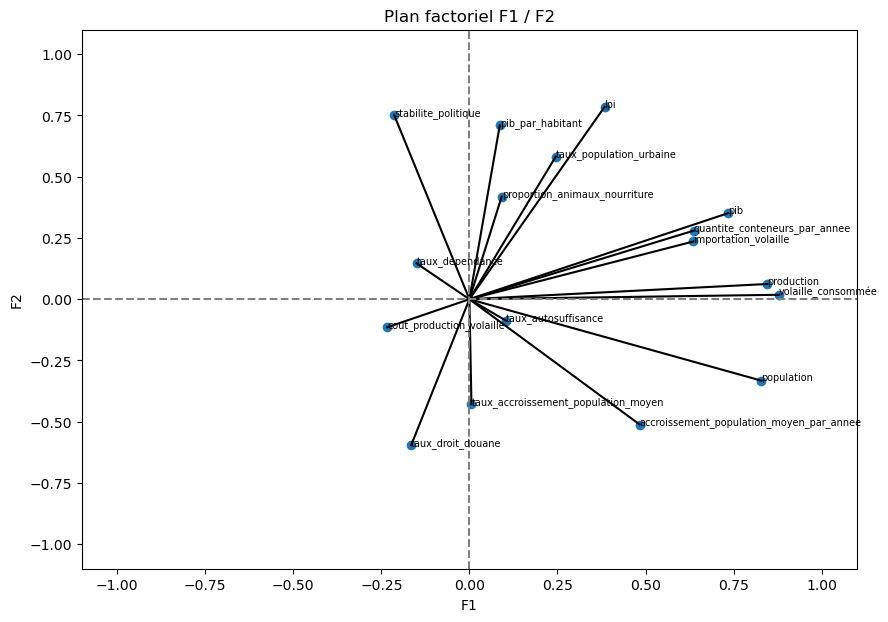

In [69]:
a, b = (0,1)

plt.figure(figsize=(10,7))

plt.title(f"Plan factoriel {df_fa.columns[a]} / {df_fa.columns[b]}")

plt.scatter(df_fa.iloc[:,a], df_fa.iloc[:,b])

for i, (x, y) in enumerate(zip(fa.loadings_.T[a, :], fa.loadings_.T[b, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df_fa.index[i], fontsize='7')
    
plt.xlabel(f"{df_fa.columns[a]}")
plt.ylabel(f"{df_fa.columns[b]}")

plt.plot([-1.1, 1.1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1.1, 1.1], color='grey', ls='--')

plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

(-1.1, 1.1)

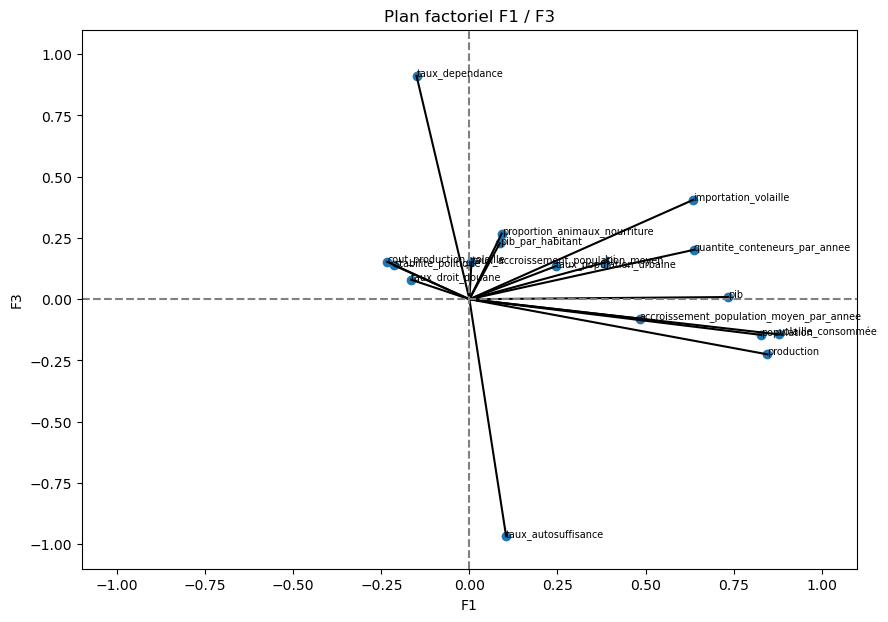

In [70]:
a, b = (0,2)

plt.figure(figsize=(10,7))

plt.title(f"Plan factoriel {df_fa.columns[a]} / {df_fa.columns[b]}")

plt.scatter(df_fa.iloc[:,a], df_fa.iloc[:,b])

for i, (x, y) in enumerate(zip(fa.loadings_.T[a, :], fa.loadings_.T[b, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df_fa.index[i], fontsize='7')
    
plt.xlabel(f"{df_fa.columns[a]}")
plt.ylabel(f"{df_fa.columns[b]}")

plt.plot([-1.1, 1.1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1.1, 1.1], color='grey', ls='--')

plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

(-1.1, 1.1)

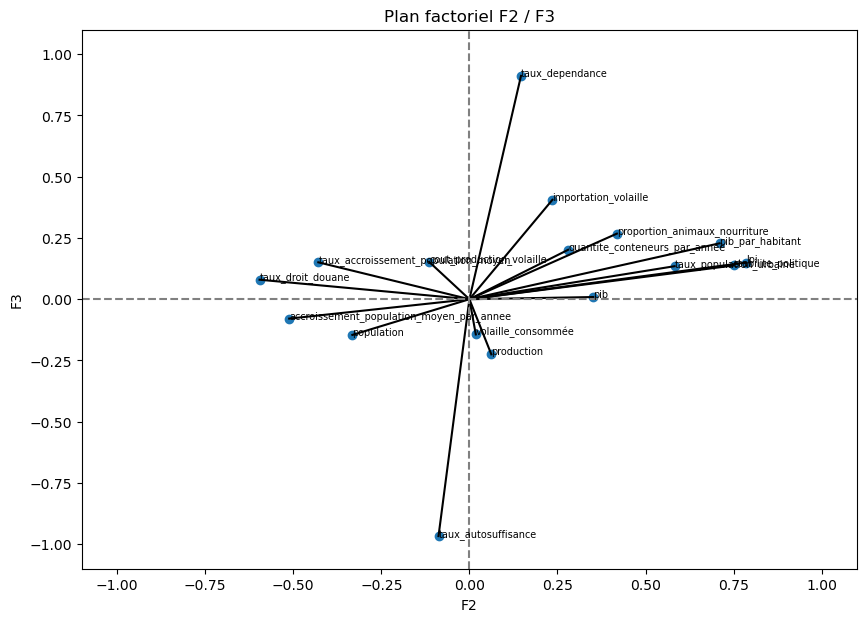

In [71]:
a, b = (1,2)

plt.figure(figsize=(10,7))

plt.title(f"Plan factoriel {df_fa.columns[a]} / {df_fa.columns[b]}")

plt.scatter(df_fa.iloc[:,a], df_fa.iloc[:,b])

for i, (x, y) in enumerate(zip(fa.loadings_.T[a, :], fa.loadings_.T[b, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, df_fa.index[i], fontsize='7')
    
plt.xlabel(f"{df_fa.columns[a]}")
plt.ylabel(f"{df_fa.columns[b]}")

plt.plot([-1.1, 1.1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1.1, 1.1], color='grey', ls='--')

plt.xlim([-1.1, 1.1])
plt.ylim([-1.1, 1.1])

In [72]:
np.abs(df_fa.values).argmax(axis=1)

array([0, 0, 0, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [73]:
df_fa['composante_principale'] = np.abs(df_fa.values).argmax(axis=1)

In [74]:
df_fa['composante_principale'] = df_fa['composante_principale'].replace([0,1,2], ['F1', 'F2', 'F3'])

In [75]:
df_fa.sort_values('composante_principale')

F1    F2    F3  \
importation_volaille                      0.64  0.24  0.41   
production                                0.85  0.06 -0.22   
volaille_consommée                        0.88  0.02 -0.14   
cout_production_volaille                 -0.23 -0.11  0.15   
quantite_conteneurs_par_annee             0.64  0.28  0.20   
population                                0.83 -0.33 -0.15   
pib                                       0.73  0.35  0.01   
taux_population_urbaine                   0.25  0.58  0.13   
taux_droit_douane                        -0.17 -0.60  0.08   
taux_accroissement_population_moyen       0.01 -0.43  0.15   
stabilite_politique                      -0.21  0.75  0.14   
accroissement_population_moyen_par_annee  0.48 -0.51 -0.08   
proportion_animaux_nourriture             0.09  0.42  0.27   
lpi                                       0.38  0.79  0.15   
pib_par_habitant                          0.09  0.71  0.23   
taux_autosuffisance                       0.10 -0.09 -0.97   
taux_dependance                          -0.15  0.15  0.91   

                                         composante_principale  
importation_volaille                                        F1  
production                                                  F1  
volaille_consommée                                          F1  
cout_production_volaille                                    F1  
quantite_conteneurs_par_annee                               F1  
population                                                  F1  
pib                                                         F1  
taux_population_urbaine                                     F2  
taux_droit_douane                                           F2  
taux_accroissement_population_moyen                         F2  
stabilite_politique                                         F2  
accroissement_population_moyen_par_annee                    F2  
proportion_animaux_nourriture                               F2  
lpi                                                         F2  
pib_par_habitant                                            F2  
taux_autosuffisance                                         F3  
taux_dependance                                             F3

[]

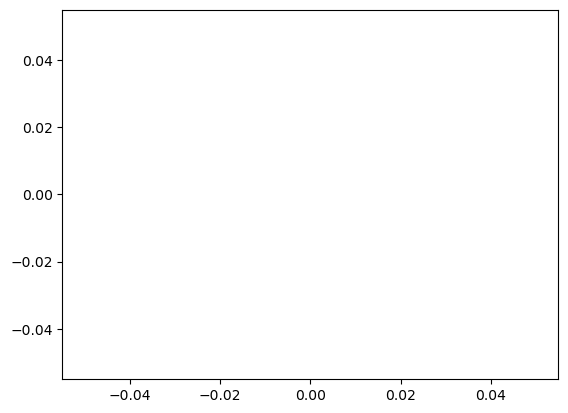

In [76]:
plt.plot()

In [77]:
fa.get_eigenvalues()[0].shape

(17,)

In [78]:
fa.get_factor_variance()

(array([4.14238906, 3.41263752, 2.3057036 ]),
 array([0.24366994, 0.20074338, 0.13562962]),
 array([0.24366994, 0.44441333, 0.58004295]))

In [79]:
rotation = ['varimax',
            'promax',
            'oblimin',
            'oblimax',
            'quartimin',
            'quartimax',
            'equamax']

In [80]:
for i in rotation : 
    fa = FactorAnalyzer(rotation=i, n_factors=3)

    fa.fit(X_scaled)

    print(i, ':', fa.get_factor_variance()[2])

varimax : [0.24366994 0.44441333 0.58004295]
promax : [0.24602629 0.44356273 0.57678212]
oblimin : [0.2363001  0.4389937  0.57126795]
oblimax : [0.26546054 0.48032047 0.58004295]
quartimin : [0.2363001  0.4389937  0.57126795]
quartimax : [0.24022689 0.44633463 0.58004295]
equamax : [0.24022689 0.44633463 0.58004295]


### 2e KMeans sur les 14 variables gardées

In [81]:
X_scaled.shape

(128, 17)

In [82]:
# on garde uniquement les colonnes dont le kmo > 0.5, soit 14 variables
X_scaled = df_X_scaled[var].values

In [83]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

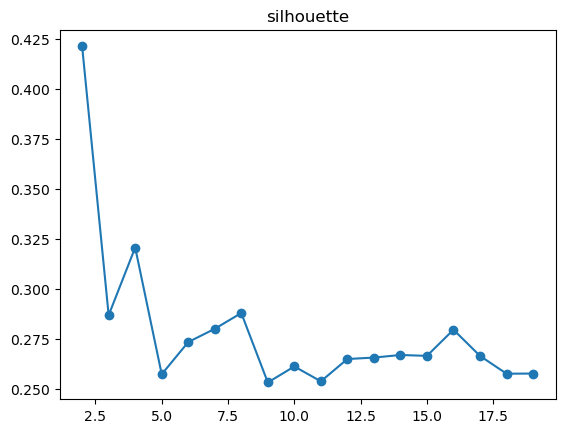

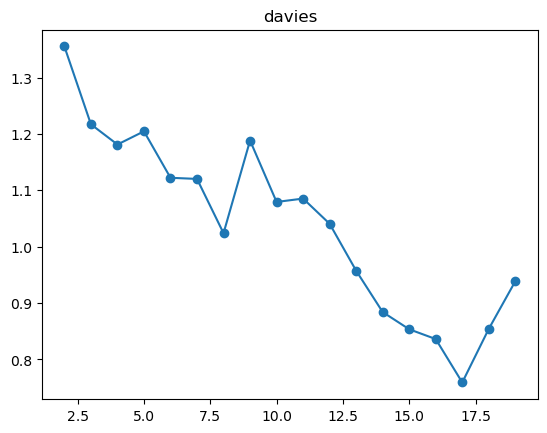

In [84]:
silhouette = []
davies = []

for n_clusters in range(2,20):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X_scaled)
    clusters_kmeans = kmeans.labels_
    #print("n_clusters : ", n_clusters)
    #print("silhouette_score : ", silhouette_score(X_scaled, clusters_kmeans))
    #print("davies_bouldin_score : ", davies_bouldin_score(X_scaled, clusters_kmeans))
    silhouette.append(silhouette_score(X_scaled, clusters_kmeans))
    davies.append(davies_bouldin_score(X_scaled, clusters_kmeans))
    #print("_"*100)
    
plt.plot(range(2,20), silhouette, marker='o')
plt.title('silhouette')
plt.show()

plt.plot(range(2,20), davies, marker='o')
plt.title('davies')
plt.show()

In [85]:
# création de l'estimateur

kmeans = KMeans(n_clusters=2)

kmeans = kmeans.fit(X_scaled)

# coordonnées des centroides

centroides = kmeans.cluster_centers_

# clusters de l'echantillon

clusters_kmeans = kmeans.labels_
df['clusters_kmeans']=clusters_kmeans

In [86]:
centroides.shape

(2, 9)

### PCA

Pour la suite, je décide de garder les variables dont le KMO est supérieur à 0.5.

Je fais ce choix car c'est celui qui m'a donné les meilleurs résultats sans enlever trop de variables.

In [87]:
# création de l'estimateur
pca = PCA(n_components=3)

pca.fit(X_scaled)

PCA(n_components=3)

In [88]:
X_scaled.shape

(128, 9)

#### Eboulis des valeurs propres, singular value

Variance absolue

Pour déterminer combien de composantes seront nécessaires

In [89]:
# création de l'estimateur
pca2 = PCA(svd_solver='full')

pca2.fit(X_scaled)

pca2.n_components_

9

In [90]:
# ici on mesure la variance absolue de chaque composante
eigval = pca2.singular_values_**2/X_scaled.shape[1]
eigval

array([56.14265201, 34.10774553,  9.14275311,  8.50167405,  6.62864985,
        5.37791704,  3.41068937,  2.7815283 ,  1.90639074])

In [91]:
# on retombe sur explained.variance.ratio_
(eigval/eigval.sum())

array([0.43861447, 0.26646676, 0.07142776, 0.06641933, 0.05178633,
       0.04201498, 0.02664601, 0.02173069, 0.01489368])

Les valeurs singulières et le taux de variance expliqué par chaque composantes sont 2 mesures complémentaires. La première exprime la variance absolue alors que la deuxième exprime la variance relative.

#### Graphique éboulie des valeurs propres, variance expliquée par chaque composante

Variance relative

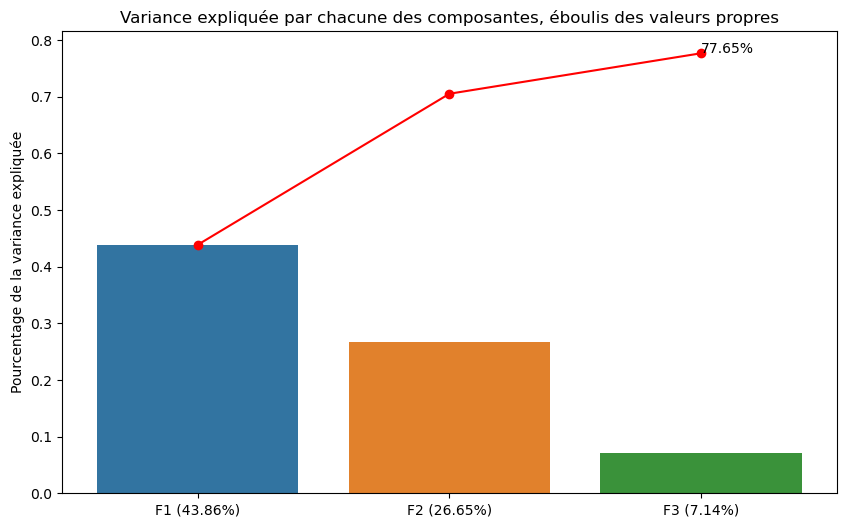

In [92]:
# explication de la variance dans chacune des composantes, éboulis des valeurs propres

cumsum_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize = (10,6))

sns.barplot(x=[n for n in range(pca.components_.shape[0])],
            y=pca.explained_variance_ratio_)

plt.plot([n for n in range(pca.components_.shape[0])], cumsum_variance, c='r', marker='o')


listF = []
for x in range(pca.components_.shape[0]):
    a = f"F{x+1} ({round(100*pca.explained_variance_ratio_[x],2)}%)"
    listF.append(a)
    
plt.text(max([n for n in range(pca.components_.shape[0])]), cumsum_variance.max(), '{:.2%}'.format(round(cumsum_variance.max(),4)))  
plt.title("Variance expliquée par chacune des composantes, éboulis des valeurs propres")
plt.ylabel("Pourcentage de la variance expliquée")
plt.xticks([n for n in range(pca.components_.shape[0])], listF);

68% de la variance est expliquée par les 3 composantes principales, l'ACP est acceptable.

#### Représentation des composantes dans les variables

On cherche à voir ce que représente chaque composante en regardant pour chaque variable par quelle composante est le plus représentée. Ensuite on groupera les variables et on dégagera une idée globale du groupe de variable pour nommer la composante principale.

In [93]:
df_composante = pd.DataFrame(data=pca.components_, index=['F1', 'F2', 'F3'], columns=var).T
df_composante

F1    F2    F3
lpi                           0.41 -0.27 -0.00
pib                           0.42  0.15  0.23
volaille_consommée            0.32  0.39 -0.26
quantite_conteneurs_par_annee 0.38  0.12  0.37
importation_volaille          0.38  0.14  0.29
population                    0.21  0.48 -0.23
taux_population_urbaine       0.31 -0.25 -0.67
pib_par_habitant              0.30 -0.42 -0.21
stabilite_politique           0.16 -0.50  0.34

#### On identifie par quelle composante chaque variable est le plus représentée

In [94]:
# on copie df_composante et on sort les variables
df_composante2 = df_composante.reset_index()
df_composante2.rename(columns={'index':'variable'}, inplace=True)

In [95]:
# on pivote les 3 composantes sur une colonne
melt = pd.melt(df_composante2, id_vars='variable', value_vars=['F1','F2','F3'], var_name = 'composantes',
        value_name='correlation')

In [96]:
# valeur absolu correlation
melt['correlation_abs'] = melt['correlation'].abs()

# window function pour avoir le rang de chaque composante
melt['rank'] = melt.groupby(['variable'])['correlation_abs'].rank(ascending=False)

In [97]:
V = melt[melt['rank']==1][['variable', 'composantes', 'correlation']]
V

variable composantes  correlation
0                             lpi          F1         0.41
1                             pib          F1         0.42
3   quantite_conteneurs_par_annee          F1         0.38
4            importation_volaille          F1         0.38
11             volaille_consommée          F2         0.39
14                     population          F2         0.48
16               pib_par_habitant          F2        -0.42
17            stabilite_politique          F2        -0.50
24        taux_population_urbaine          F3        -0.67

#### Analyse du sens des composantes principales

2eme itération : analyse sans les outliers

F1 : 
- Associé à la taille du pays, à la richesse globale et au flux économique global.
- On l'associe globalement à la **Puissance commerciale et logistique**.


F2 : 
- Associé à la pauvreté, au non développement urbain et logistique du pays et à la non stabilité politique.
- On l'associe globalement à la **Taille et qualité de vie**.


F3 : 
- Associé à la présence viande dans la nourriture, à la non auto-suffisance et cout de production assez élevé de la volaille
- On l'associe globalement à **Condition de marché**.

1ère itération : analyse avec les outliers

F1 : 
- Associé à la taille du pays, à la richesse globale et au flux économique global.
- On l'associe globalement à la **Puissance économique**.


F2 : 
- Associé à la pauvreté, au non développement urbain et logistique du pays et à la non stabilité politique.
- On l'associe globalement à la **Qualité de vie des individus**.


F3 : 
- Associé à la présence viande dans la nourriture, à la non auto-suffisance et cout de production assez élevé de la volaille
- On l'associe globalement à **Condition de marché et demande en volaille**.

#### Cercle de corrélation et Représentation des individus sur le plan factoriel

In [98]:
# représenation des individus sur le plan factoriel
X_projected = pca.transform(X_scaled)

df_projection = pd.DataFrame(data=X_projected, columns=['F1', 'F2', 'F3'], index=pays)
df_projection

F1    F2    F3
Afrique du Sud                                      2.01  1.51 -0.11
Albanie                                            -1.33 -0.38  0.20
Algérie                                            -0.99  0.83 -0.83
Allemagne                                           6.68  1.12  1.78
Angola                                             -0.92  0.81 -0.03
Antigua-et-Barbuda                                 -1.45 -0.66  1.29
Arabie saoudite                                     2.58  1.10  0.05
Argentine                                           1.01  0.49 -1.58
Arménie                                            -1.53  0.18 -0.26
Australie                                           2.74 -1.32 -0.47
Autriche                                            0.91 -2.03  0.27
Azerbaïdjan                                        -1.47  0.49 -0.03
Barbade                                            -1.60 -0.68  1.20
Belgique                                            2.70 -1.71 -0.13
Belize                                             -1.54 -0.23  0.49
Bolivie (État plurinational de)                    -1.15  0.29 -0.34
Bosnie-Herzégovine                                 -1.45 -0.00  0.20
Botswana                                           -0.87 -1.06  0.09
Bulgarie                                           -0.46 -0.69 -0.25
Bélarus                                            -0.84 -0.16 -0.53
Bénin                                              -1.26  0.18  0.59
Cameroun                                           -1.79  0.92 -0.30
Canada                                              3.22 -0.83 -0.09
Chili                                               0.73 -0.50 -0.45
Chine - RAS de Hong-Kong                            4.58 -1.32  1.31
Chine - RAS de Macao                                1.53 -3.51 -1.26
Chypre                                             -0.58 -1.18 -0.10
Colombie                                            0.39  1.35 -1.26
Congo                                              -1.33  0.19 -0.37
Congo                                              -2.02  1.50 -0.27
Costa Rica                                         -0.60 -0.90 -0.31
Croatie                                            -0.76 -0.96  0.34
Côte d'Ivoire                                      -1.50  0.77 -0.10
Danemark                                            1.52 -2.54 -0.82
Dominique                                          -0.66 -1.40  0.05
El Salvador                                        -1.15 -0.15 -0.45
Espagne                                             3.30  0.33  0.38
Estonie                                            -0.40 -1.36 -0.12
Eswatini                                           -1.86  0.28  1.03
Fidji                                              -1.54 -0.48  0.35
Finlande                                            1.13 -2.52 -0.66
France                                              4.22  0.49  0.17
Fédération de Russie                                3.04  4.37 -1.93
Gabon                                              -1.12 -0.32 -0.81
Ghana                                              -1.00  0.39  0.33
Grèce                                               0.24 -0.70 -0.49
Guatemala                                          -1.12  0.70  0.18
Guyana                                             -2.10  0.24  1.06
Géorgie                                            -1.48  0.12  0.05
Honduras                                           -1.42  0.35 -0.05
Hongrie                                            -0.01 -1.07  0.00
Indonésie                                           2.25  4.40 -0.90
Iran (République islamique d')                      0.44  2.31 -1.63
Iraq                                               -0.55  2.17 -0.82
Irlande                                             1.10 -2.51 -0.12
Islande                                             0.92 -3.22 -1.23
Israël                                              0.80 -0.89 -1.69
Italie                                              

Tous les individus ont été transformés sur le plan factoriel. C'est à dire qu'ils ont été réduit selon leurs composantes principales.

In [99]:
V

variable composantes  correlation
0                             lpi          F1         0.41
1                             pib          F1         0.42
3   quantite_conteneurs_par_annee          F1         0.38
4            importation_volaille          F1         0.38
11             volaille_consommée          F2         0.39
14                     population          F2         0.48
16               pib_par_habitant          F2        -0.42
17            stabilite_politique          F2        -0.50
24        taux_population_urbaine          F3        -0.67

In [100]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(20, 18))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # # Affichage du titre
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [101]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None,
                                centroides=None,
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center')
    
    # On vérifie s'il y a des centroides ou non
    if centroides is None : 
        centroides = []
    if len(centroides) :   
    # visualisation des centroides sous forme de croix rouge
        plt.scatter(centroides[:,x], centroides[:,y], c='r', marker='x', s=100)

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

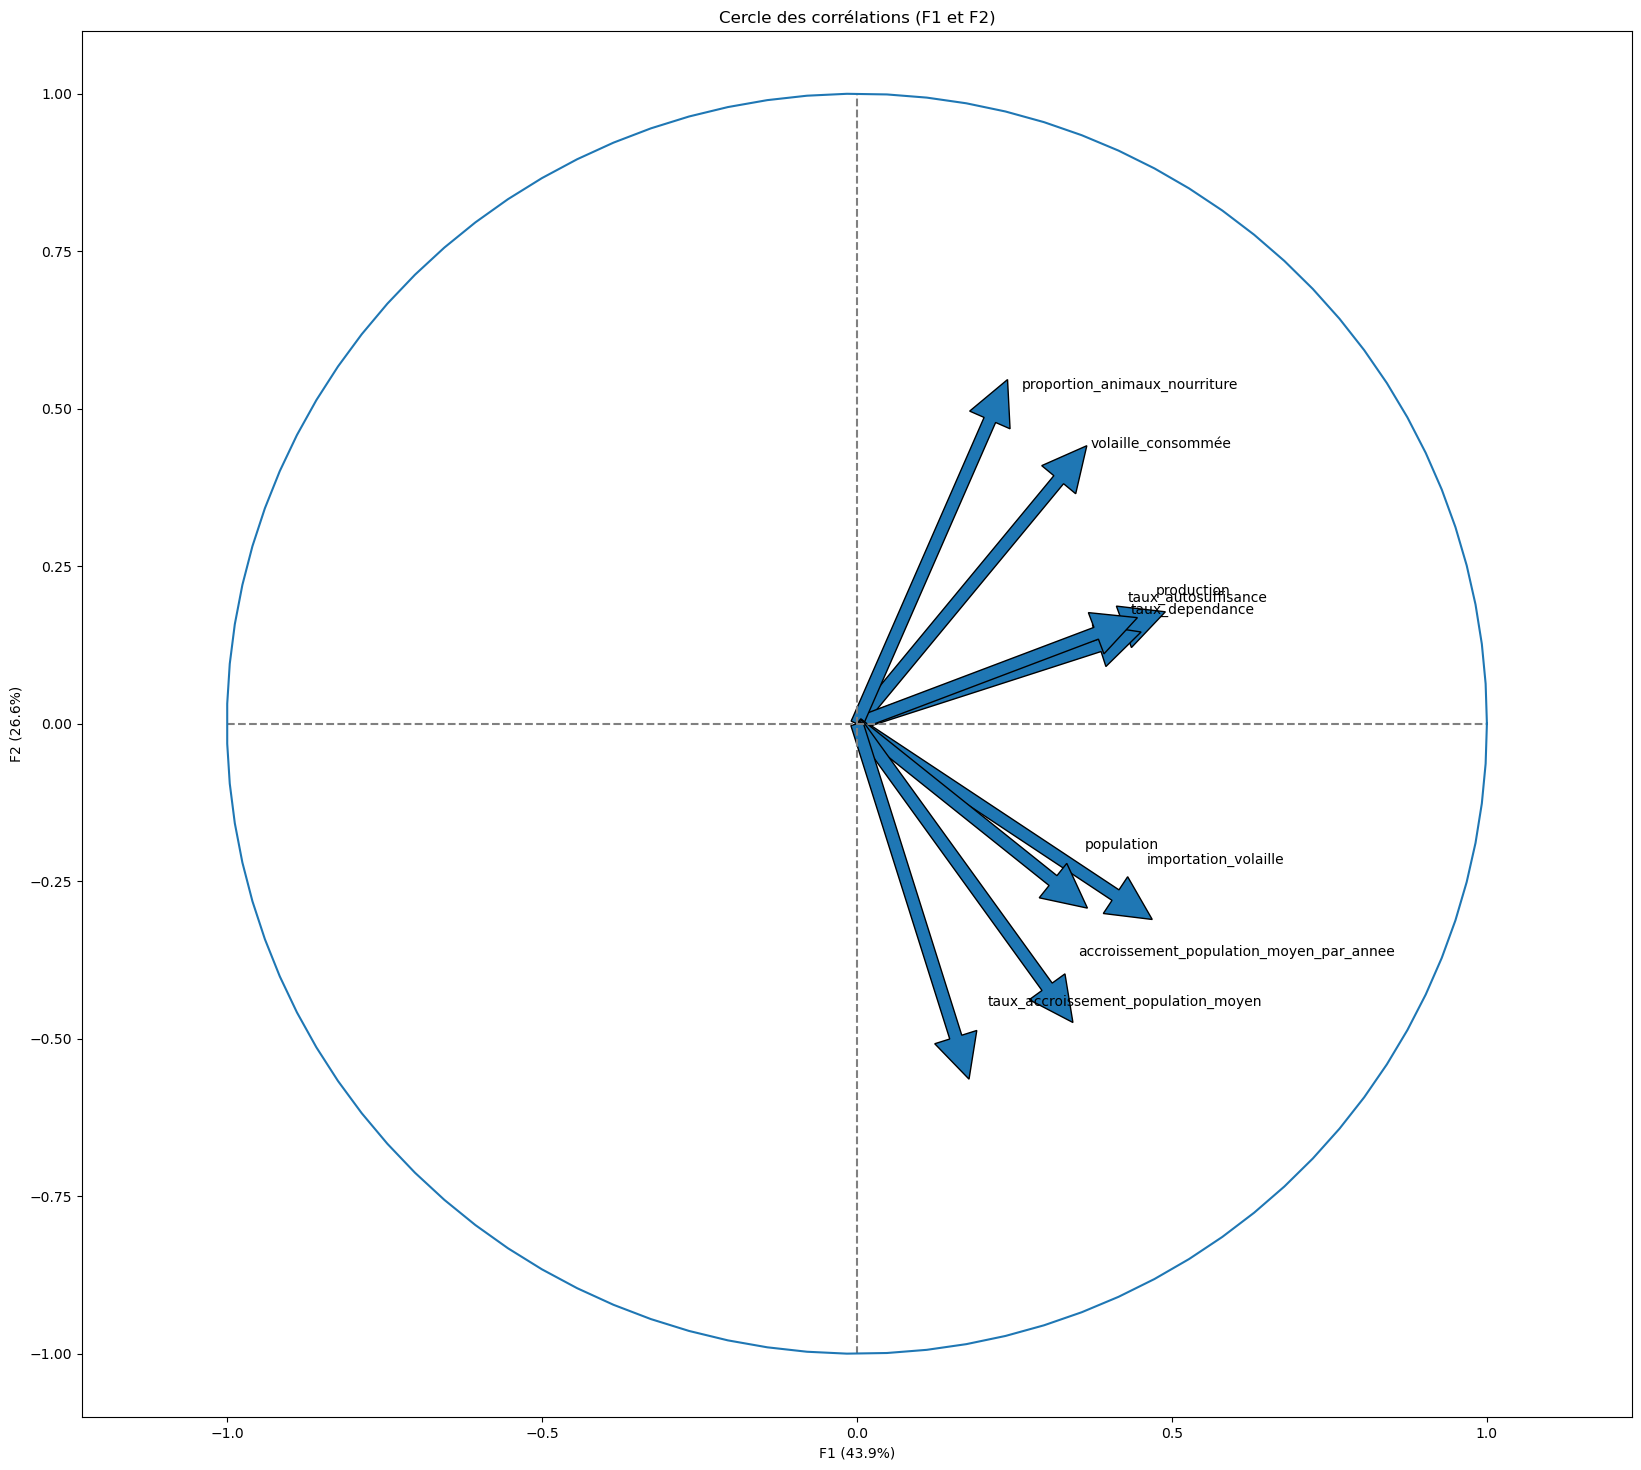

In [102]:
# Plan factoriel composé de F1 et F2
# affichage des variables sur ce plan factoriel
# affichage du cercle des corrélations

x_y = (0,1)
features = kmo_col
correlation_graph(pca, x_y, features)

Itération 2 :
2 groupes de variables 

idéalement on veut des pays entre les 2 groupes :
F1>0
-0.3<F2<0.3

on veut surtout éviter la partie gauche de cercle

Itération 1 :

On peut confirmer les groupes de variables indiqués ci-dessus. 

On a bien un groupe de variables pointant vers le quart supérieur droit qu'on peut représenter par la **Puissance économique** avec une dimension marché étant donné que "volaille consommé" pointe aussi dans cette direction.

Puis un autre groupe de variable pointant le quart inférieur droit qu'on peut représenter par la **Qualité de vie des individus**.

Sur ce plan factoriel, on cherchera plutôt des pays positionnés entre les 2 groupes de variables, avec une assez forte puissance économique et une bonne qualité de vie. C'est à dire avec un F1 positif fort et un F2 négatif fort (idéalement).

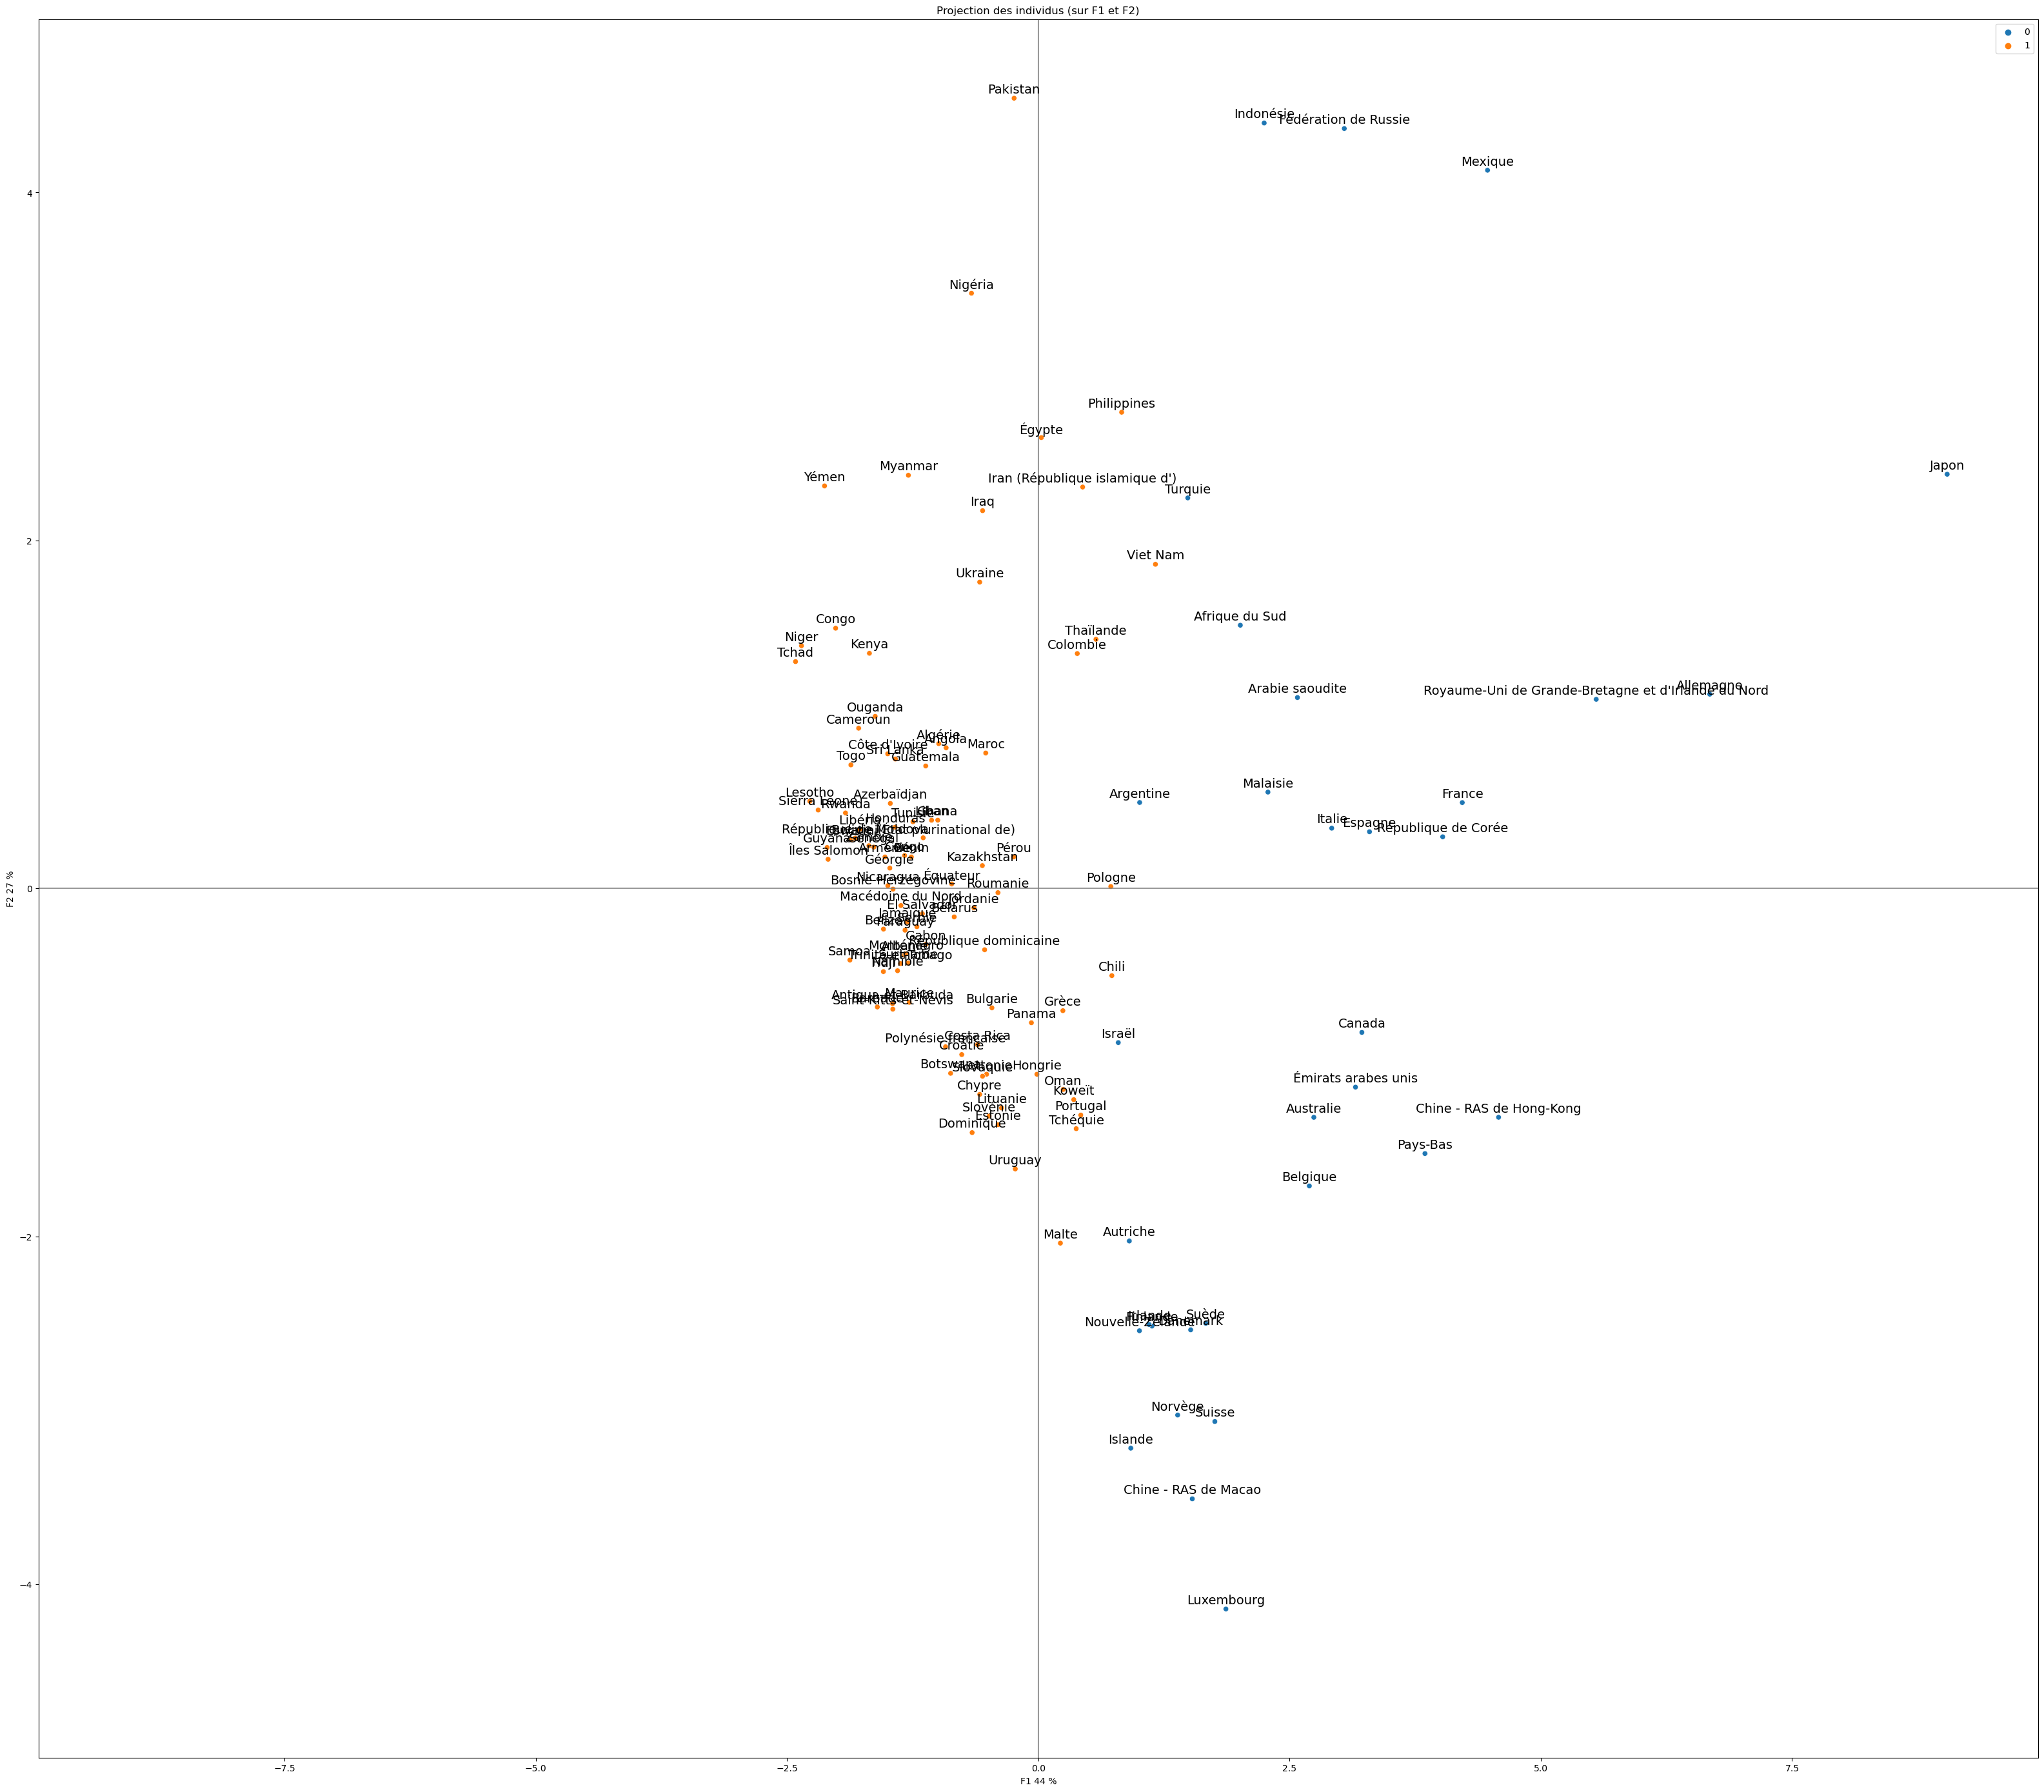

In [103]:
x_y = (0,1)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = pays,
                                clusters=clusters_kmeans,
                                centroides=None,
                                alpha=1,
                                figsize=[40,35],
                                marker="." )

Les pays adaptés pour implanter une nouvelle usine de poulets sont plutôt ceux qui appartiennent aux clusters en bas à droite. 
On y retrouve par exemple, l'Irlande du Nord, l'Allemagne ou le Japon.

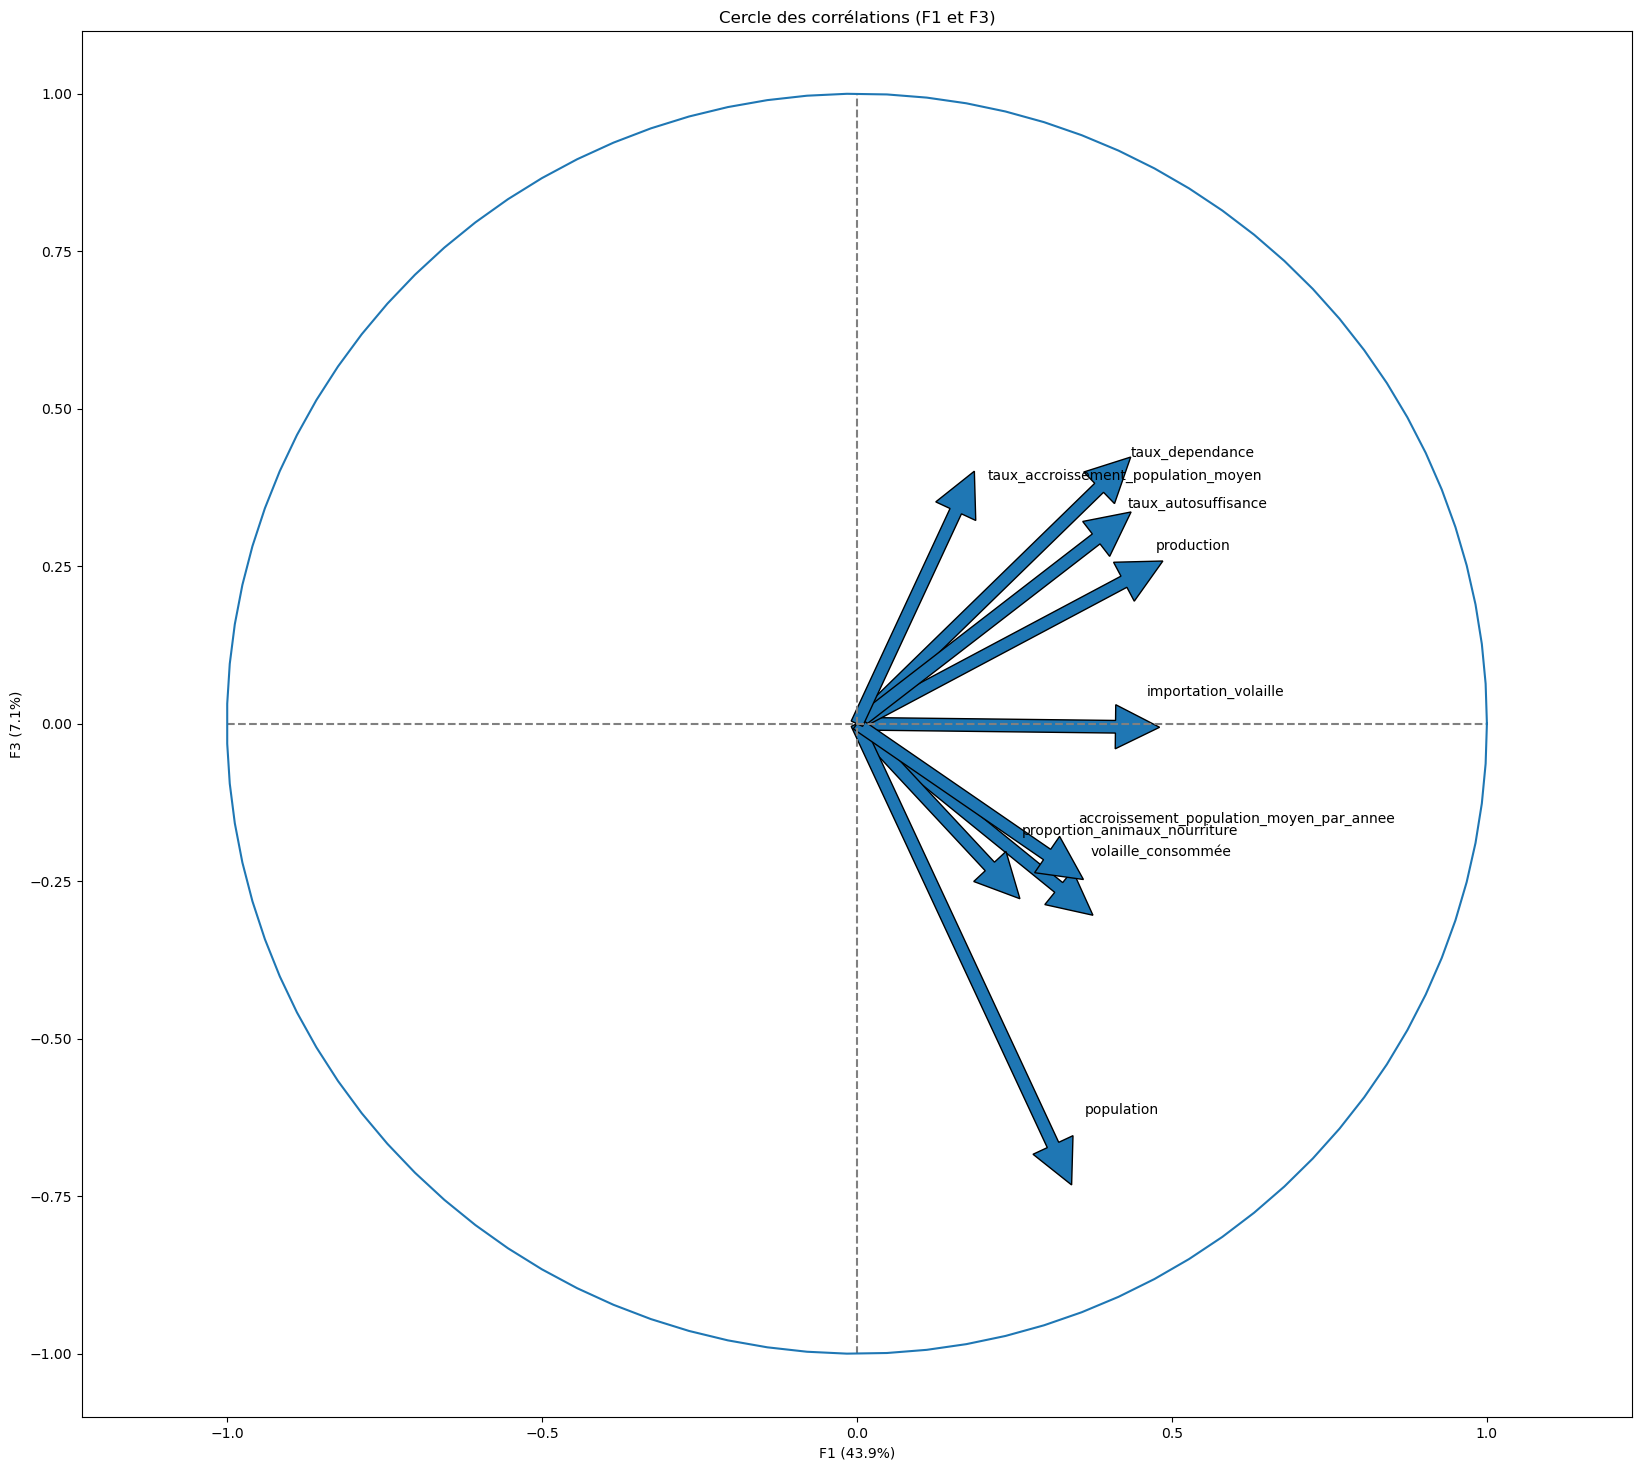

In [104]:
# Cercle des corrélation sur F1 et F3

x_y = (0,2)
correlation_graph(pca, x_y, features)

2e itération : 

100% partie droite supérieur du cercle

éviter les autres parties --> variables défavorables pour l'étude de marché

F1>0
F3>0

On retrouve bien des groupes de variables, avec notamment sur F3 le "taux d'autosuffisance" (avec F3 négative) et "proportion volaille dans la nourriture" (avec F3 positive) qu'on peut repésenter la "Condition de marché et demande en volaille".

Selon F3, on cherchera ici des pays appartenant à la moitié supérieur du cercle, idéalement pointant plutôt vers la droite pour éviter les coûts de douane et de production trop élévés.

Selon F1, on a toujours les variables associées à la puissance économique du pays, avec certaines variables associées à la qualité de vie des individus qui se sont ajoutées au groupes en pointant vers le côté droit supérieur du cercle.

Sur ce plan factoriel, on cherchera donc des pays appartenant à la partie supérieur droite du cercle.

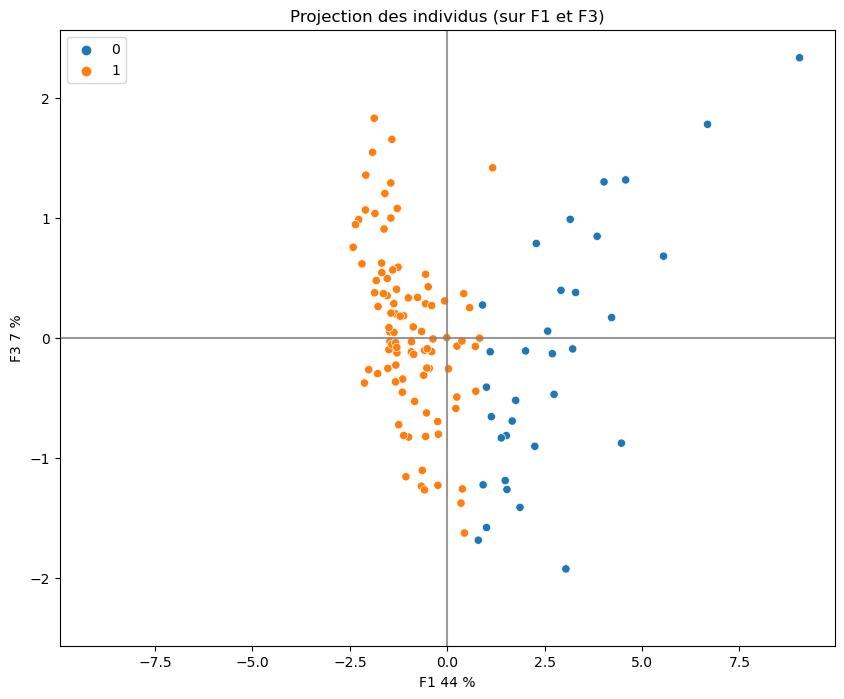

In [105]:
x_y = (0,2)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = None,#pays,
                                clusters=clusters_kmeans, 
                                centroides=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." )

Ici il semblerait que se soit plutôt le Brésil, Hong Kong ou Macao qui soit intéressant.

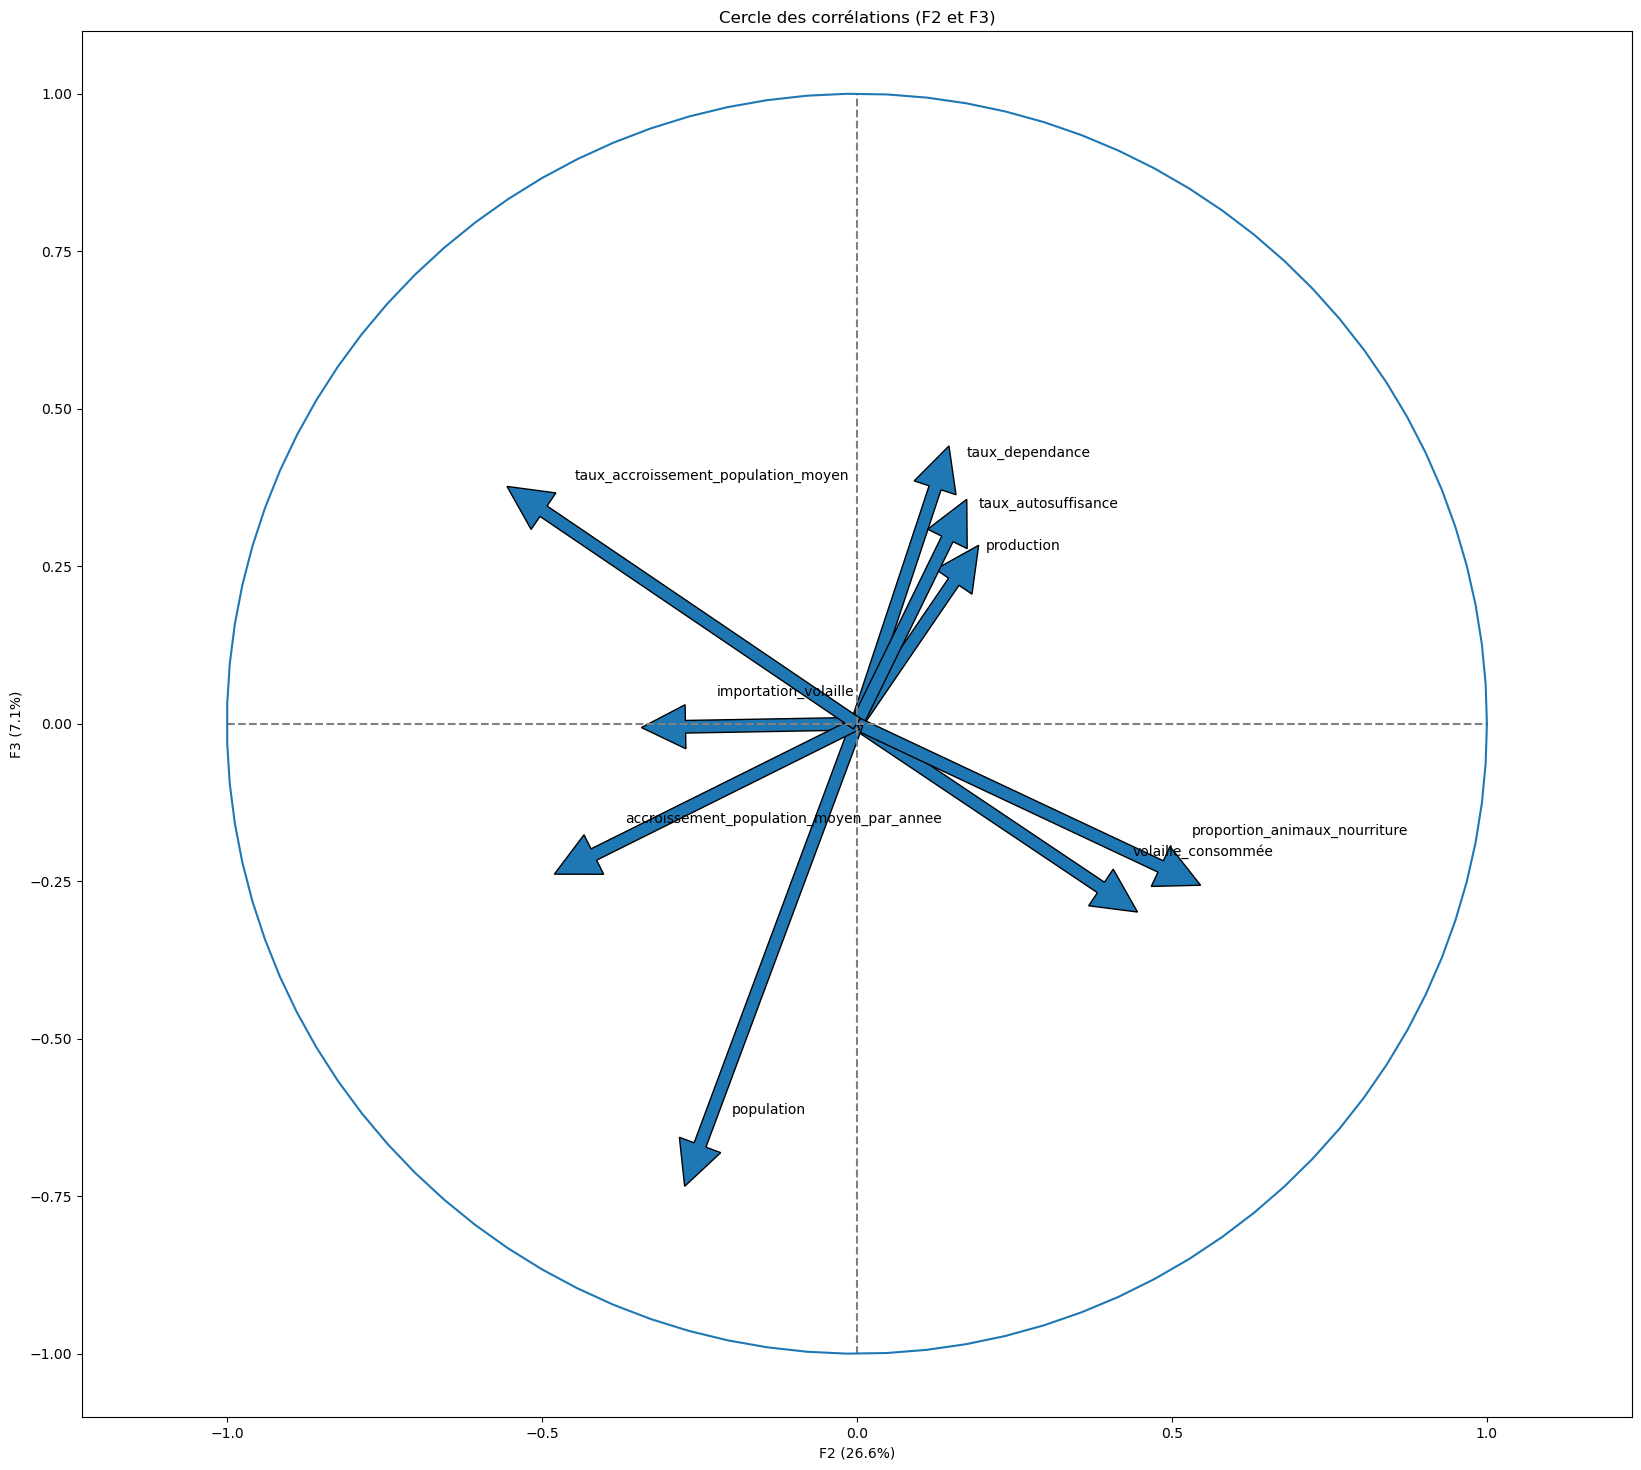

In [106]:
# Cercle des corrélation sur F2 et F3

x_y = (1,2)
correlation_graph(pca, x_y, features)

2e itération : 

Partie supérieur

éviter la partie inférieur

F3>0


Ici, plusieurs de groupes de variables.

On privilégiera les variables bien représentées sur ce plan factoriel, on a le groupe "stabilité, pib/habitant, taux population urbaine et lpi" plutôt associé à la qualité de vie des individus qui ppinte vers la partie gauche de cercle.

Puis le taux d'autosuffisance (négatif) et la proportion de volaille dans la nourriture associée aux conditions de marché qui indique plutôt la partie supérieur gauche du cercle.

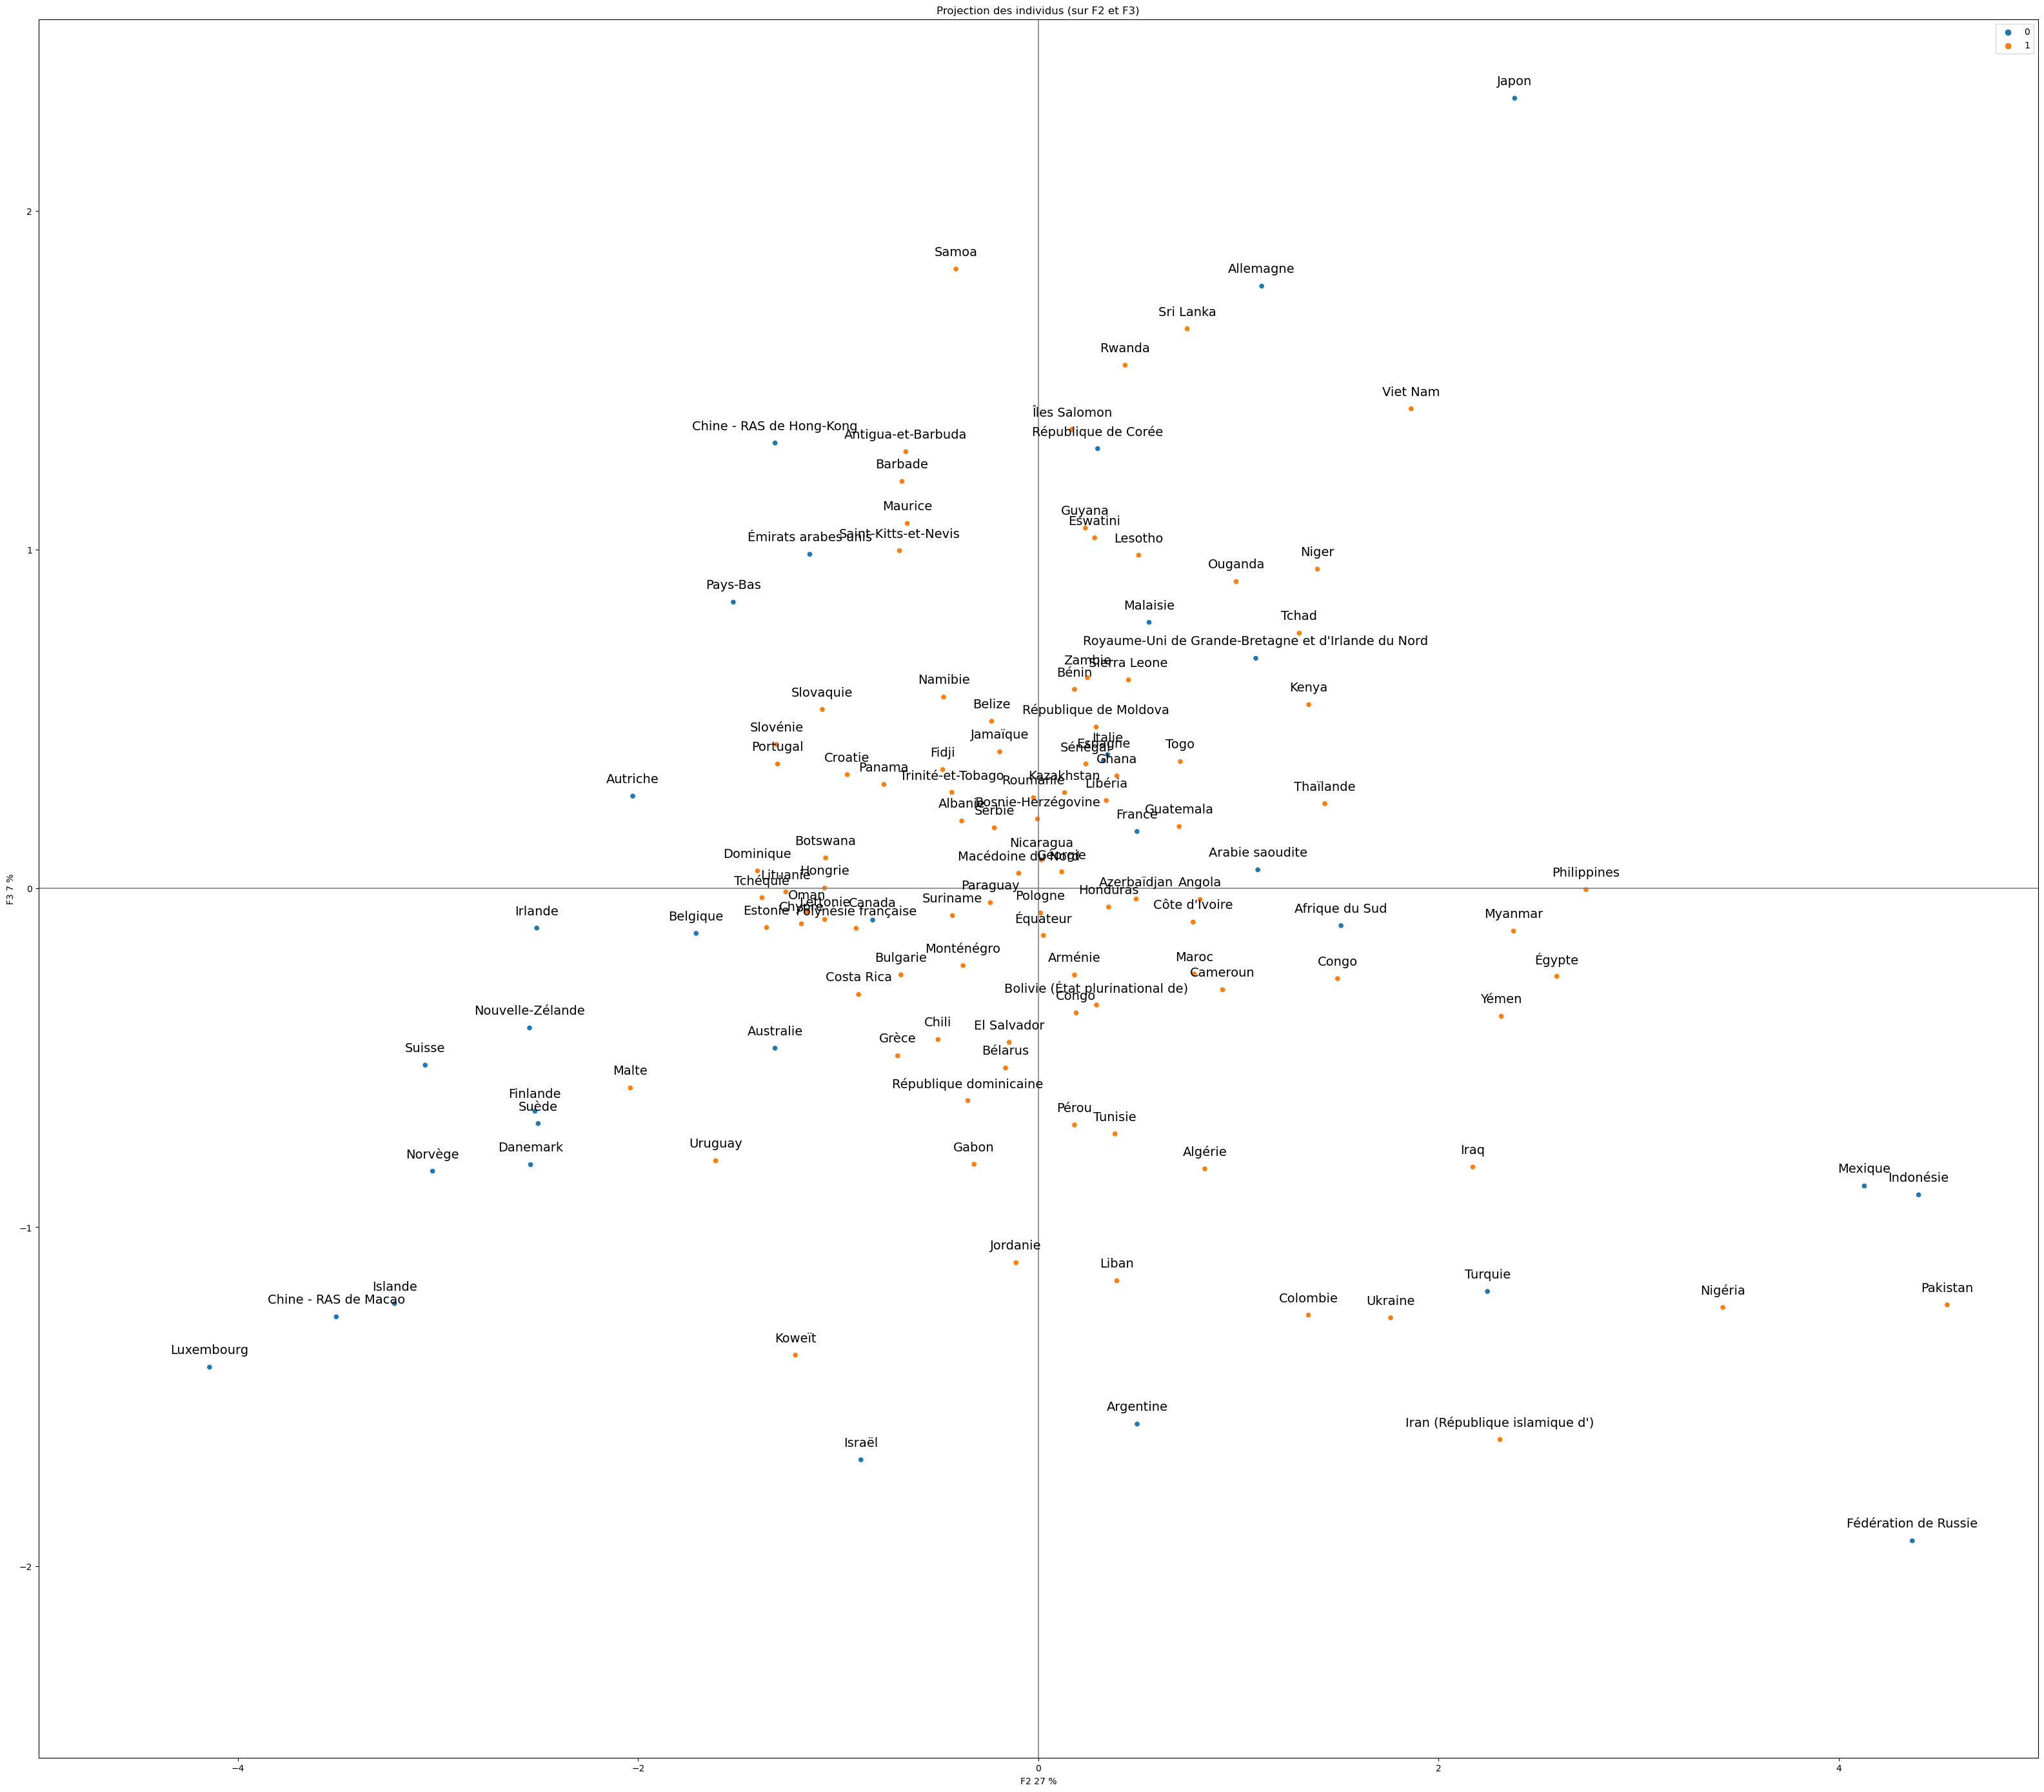

In [107]:
x_y = (1,2)

display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=pca, 
                                labels = pays,
                                clusters=clusters_kmeans, 
                                centroides=None, 
                                alpha=1,
                                figsize=[40,35], 
                                marker="." )

On retrouve encore Macao et Honk Kong.

Polynésie, Luxembourg, Islande et Emirats Arabe Unis aussi éventuellement.

### Qualité de représentation des individus

Pour calculer la qualité de représentation des individus sur les axes, nous devons d’abord calculer les carrés des distances à l’origine des individus, qui correspondent également à leur contribution dans l’inertie totale.

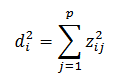

In [108]:
di2 = np.sum(X_scaled**2,axis=1)

df_di2 = pd.DataFrame({'di2':di2}, index=pays)
df_di2.sort_values('di2', ascending=False)

di2
Japon                                              99.72
Allemagne                                          53.03
Mexique                                            49.43
Fédération de Russie                               41.79
Indonésie                                          40.69
Chine - RAS de Hong-Kong                           36.47
Royaume-Uni de Grande-Bretagne et d'Irlande du ... 35.42
Pakistan                                           30.07
Luxembourg                                         28.98
République de Corée                                28.82
Nigéria                                            22.51
France                                             22.11
Pays-Bas                                           20.55
Malaisie                                           17.83
Chine - RAS de Macao                               17.81
Émirats arabes unis                                17.47
Suisse                                             16.82
Yémen                                              14.84
Islande                                            14.20
Norvège                                            13.97
Arabie saoudite                                    13.29
Espagne                                            13.21
Canada                                             12.89
Iraq                                               12.83
Belgique                                           12.56
Turquie                                            11.80
Italie                                             11.71
Australie                                          11.68
Irlande                                            10.69
Suède                                              10.53
Congo                                              10.53
Afrique du Sud                                     10.52
Danemark                                           10.33
Niger                                               9.79
Iran (République islamique d')                      9.75
Viet Nam                                            9.74
Philippines                                         9.47
Myanmar                                             9.36
Tchad                                               9.22
Finlande                                            8.94
Samoa                                               8.74
Nouvelle-Zélande                                    8.30
Égypte                                              8.09
Autriche                                            7.52
Rwanda                                              6.84
Lesotho                                             6.76
Îles Salomon                                        6.70
Kenya                                               6.63
Sri Lanka                                           6.35
Sierra Leone                                        6.26
Ukraine                                             6.16
Argentine                                           6.13
Israël                                              6.09
Guyana                                              6.07
Barbade                                             5.84
Malte                                               5.66
Ouganda                                             5.56
Antigua-et-Barbuda                                  5.41
Thaïlande                                           5.24
Liban                                               5.22
Uruguay                                             5.14
Eswatini                                            4.92
Cameroun                                            4.65
Koweït                                              4.63
Gabon                                               4.57
Saint-Kitts-et-Nevis                                4.53
Togo                                                4.51
Colombie                                            4.32
Maurice                                             3.94
Dominique                                           3.88
Angola

<AxesSubplot:xlabel='di2'>

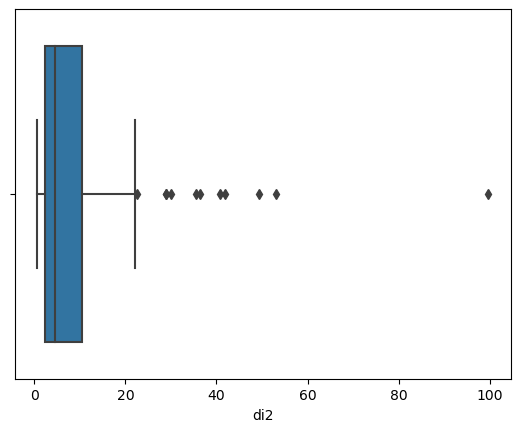

In [109]:
sns.boxplot(df_di2['di2'])

Ensuite nous devons calculer le cos² de chaque individu pour chaque composante qui représente la qualité de représentation par rapport à cette composante.

Ensuite on ajoutera les cos² des 2 composantes principales pour chaque plan factoriel.
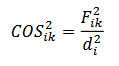

In [110]:
df_projection.shape

(128, 3)

In [111]:
# multiplication de tous les termes par eux même
cos2 = df_projection**2

# application de la formule ci-dessus
for j in range(cos2.columns.shape[0]):    
    cos2.iloc[:,j] = cos2.iloc[:,j]/di2
    
cos2.columns = ['cos2_1', 'cos2_2', 'cos2_3']

cos2

cos2_1  cos2_2  cos2_3
Afrique du Sud                                        0.38    0.22    0.00
Albanie                                               0.71    0.06    0.02
Algérie                                               0.32    0.23    0.23
Allemagne                                             0.84    0.02    0.06
Angola                                                0.22    0.17    0.00
Antigua-et-Barbuda                                    0.39    0.08    0.31
Arabie saoudite                                       0.50    0.09    0.00
Argentine                                             0.17    0.04    0.41
Arménie                                               0.78    0.01    0.02
Australie                                             0.64    0.15    0.02
Autriche                                              0.11    0.55    0.01
Azerbaïdjan                                           0.78    0.09    0.00
Barbade                                               0.44    0.08    0.25
Belgique                                              0.58    0.23    0.00
Belize                                                0.86    0.02    0.09
Bolivie (État plurinational de)                       0.57    0.04    0.05
Bosnie-Herzégovine                                    0.90    0.00    0.02
Botswana                                              0.24    0.36    0.00
Bulgarie                                              0.14    0.32    0.04
Bélarus                                               0.35    0.01    0.14
Bénin                                                 0.70    0.01    0.15
Cameroun                                              0.69    0.18    0.02
Canada                                                0.80    0.05    0.00
Chili                                                 0.31    0.14    0.11
Chine - RAS de Hong-Kong                              0.58    0.05    0.05
Chine - RAS de Macao                                  0.13    0.69    0.09
Chypre                                                0.18    0.74    0.01
Colombie                                              0.03    0.42    0.37
Congo                                                 0.56    0.01    0.04
Congo                                                 0.39    0.21    0.01
Costa Rica                                            0.18    0.39    0.05
Croatie                                               0.29    0.46    0.06
Côte d'Ivoire                                         0.64    0.17    0.00
Danemark                                              0.22    0.62    0.06
Dominique                                             0.11    0.51    0.00
El Salvador                                           0.64    0.01    0.10
Espagne                                               0.82    0.01    0.01
Estonie                                               0.07    0.79    0.01
Eswatini                                              0.70    0.02    0.22
Fidji                                                 0.63    0.06    0.03
Finlande                                              0.14    0.71    0.05
France                                                0.80    0.01    0.00
Fédération de Russie                                  0.22    0.46    0.09
Gabon                                                 0.27    0.02    0.14
Ghana                                                 0.55    0.08    0.06
Grèce                                                 0.04    0.32    0.16
Guatemala                                             0.60    0.24    0.02
Guyana                                                0.73    0.01    0.19
Géorgie                                               0.88    0.01    0.00
Honduras                                              0.87    0.05    0.00
Hongrie                                               0.00    0.65    0.00
Indonésie                                             0.12    0.48    0.02
Iran (République islamique d')                        0.02    0.55    0.27
Ir

In [112]:
cos2['total'] = cos2.sum(axis=1)
cos2

cos2_1  cos2_2  cos2_3  \
Afrique du Sud                                        0.38    0.22    0.00   
Albanie                                               0.71    0.06    0.02   
Algérie                                               0.32    0.23    0.23   
Allemagne                                             0.84    0.02    0.06   
Angola                                                0.22    0.17    0.00   
Antigua-et-Barbuda                                    0.39    0.08    0.31   
Arabie saoudite                                       0.50    0.09    0.00   
Argentine                                             0.17    0.04    0.41   
Arménie                                               0.78    0.01    0.02   
Australie                                             0.64    0.15    0.02   
Autriche                                              0.11    0.55    0.01   
Azerbaïdjan                                           0.78    0.09    0.00   
Barbade                                               0.44    0.08    0.25   
Belgique                                              0.58    0.23    0.00   
Belize                                                0.86    0.02    0.09   
Bolivie (État plurinational de)                       0.57    0.04    0.05   
Bosnie-Herzégovine                                    0.90    0.00    0.02   
Botswana                                              0.24    0.36    0.00   
Bulgarie                                              0.14    0.32    0.04   
Bélarus                                               0.35    0.01    0.14   
Bénin                                                 0.70    0.01    0.15   
Cameroun                                              0.69    0.18    0.02   
Canada                                                0.80    0.05    0.00   
Chili                                                 0.31    0.14    0.11   
Chine - RAS de Hong-Kong                              0.58    0.05    0.05   
Chine - RAS de Macao                                  0.13    0.69    0.09   
Chypre                                                0.18    0.74    0.01   
Colombie                                              0.03    0.42    0.37   
Congo                                                 0.56    0.01    0.04   
Congo                                                 0.39    0.21    0.01   
Costa Rica                                            0.18    0.39    0.05   
Croatie                                               0.29    0.46    0.06   
Côte d'Ivoire                                         0.64    0.17    0.00   
Danemark                                              0.22    0.62    0.06   
Dominique                                             0.11    0.51    0.00   
El Salvador                                           0.64    0.01    0.10   
Espagne                                               0.82    0.01    0.01   
Estonie                                               0.07    0.79    0.01   
Eswatini                                              0.70    0.02    0.22   
Fidji                                                 0.63    0.06    0.03   
Finlande                                              0.14    0.71    0.05   
France                                                0.80    0.01    0.00   
Fédération de Russie                                  0.22    0.46    0.09   
Gabon                                                 0.27    0.02    0.14   
Ghana                                                 0.55    0.08    0.06   
Grèce                                                 0.04    0.32    0.16   
Guatemala                                             0.60    0.24    0.02   
Guyana                                                0.73    0.01    0.19   
Géorgie                                               0.88    0.01    0.00   
Honduras                                              0.87    0.05    0.00   
Hongrie                                               0.00    0.65    0.00

<AxesSubplot:xlabel='total', ylabel='Count'>

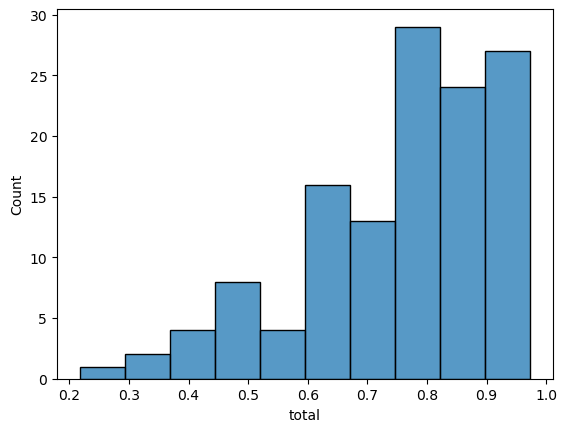

In [113]:
sns.histplot(cos2['total'])

In [114]:
cos2.sort_values('cos2_1', ascending=False)

cos2_1  cos2_2  cos2_3  \
Nicaragua                                             0.91    0.00    0.00   
Sénégal                                               0.90    0.02    0.05   
Macédoine du Nord                                     0.90    0.00    0.00   
Bosnie-Herzégovine                                    0.90    0.00    0.02   
République de Moldova                                 0.89    0.02    0.06   
Géorgie                                               0.88    0.01    0.00   
Paraguay                                              0.88    0.03    0.00   
Serbie                                                0.87    0.03    0.02   
Royaume-Uni de Grande-Bretagne et d'Irlande du ...    0.87    0.03    0.01   
Honduras                                              0.87    0.05    0.00   
Libéria                                               0.86    0.03    0.02   
Belize                                                0.86    0.02    0.09   
Allemagne                                             0.84    0.02    0.06   
Espagne                                               0.82    0.01    0.01   
Japon                                                 0.82    0.06    0.05   
France                                                0.80    0.01    0.00   
Canada                                                0.80    0.05    0.00   
Zambie                                                0.80    0.02    0.11   
Équateur                                              0.79    0.00    0.02   
Azerbaïdjan                                           0.78    0.09    0.00   
Arménie                                               0.78    0.01    0.02   
Togo                                                  0.77    0.11    0.03   
Sierra Leone                                          0.77    0.03    0.06   
Lesotho                                               0.76    0.04    0.14   
Monténégro                                            0.76    0.06    0.02   
Jamaïque                                              0.75    0.02    0.07   
Suriname                                              0.74    0.08    0.00   
Italie                                                0.73    0.01    0.01   
Guyana                                                0.73    0.01    0.19   
Pays-Bas                                              0.72    0.11    0.03   
Albanie                                               0.71    0.06    0.02   
Bénin                                                 0.70    0.01    0.15   
Eswatini                                              0.70    0.02    0.22   
Trinité-et-Tobago                                     0.70    0.07    0.03   
Cameroun                                              0.69    0.18    0.02   
Namibie                                               0.66    0.07    0.11   
Îles Salomon                                          0.65    0.00    0.27   
El Salvador                                           0.64    0.01    0.10   
Australie                                             0.64    0.15    0.02   
Côte d'Ivoire                                         0.64    0.17    0.00   
Tchad                                                 0.63    0.18    0.06   
Fidji                                                 0.63    0.06    0.03   
Guatemala                                             0.60    0.24    0.02   
Belgique                                              0.58    0.23    0.00   
Chine - RAS de Hong-Kong                              0.58    0.05    0.05   
Bolivie (État plurinational de)                       0.57    0.04    0.05   
Émirats arabes unis                                   0.57    0.07    0.06   
Niger                                                 0.57    0.20    0.09   
Congo                                                 0.56    0.01    0.04   
République de Corée                                   0.56    0.00    0.06   
Ghana                                                 0.55    0.08    0.06

### 1er Tri

Pour simplifier et dégrossir le problème, on souhaite sur les 3 plans factoriels :
- Puissance économique + --> F1 > 0
- Qualité de vie des individus + --> F2 < 0
- Condition de marché et demande en volaille + --> F3 > 0

In [115]:
df_projection2 = df_projection.copy()

In [116]:
df_projection2['clusters_cah'] = clusters_cah

In [117]:
df_projection2['clusters_kmeans'] = clusters_kmeans

In [118]:
df_projection2[(df_projection2['F1']>0)&(df_projection2['F2']<0)&(df_projection2['F3']>0)]

F1    F2   F3  clusters_cah  clusters_kmeans
Autriche                 0.91 -2.03 0.27             1                0
Chine - RAS de Hong-Kong 4.58 -1.32 1.31             2                0
Pays-Bas                 3.85 -1.52 0.85             2                0
Portugal                 0.42 -1.30 0.37             1                1
Émirats arabes unis      3.16 -1.14 0.99             0                0

In [119]:
df_projection2[df_projection2['clusters_kmeans']==0]

F1    F2    F3  \
Afrique du Sud                                     2.01  1.51 -0.11   
Allemagne                                          6.68  1.12  1.78   
Arabie saoudite                                    2.58  1.10  0.05   
Argentine                                          1.01  0.49 -1.58   
Australie                                          2.74 -1.32 -0.47   
Autriche                                           0.91 -2.03  0.27   
Belgique                                           2.70 -1.71 -0.13   
Canada                                             3.22 -0.83 -0.09   
Chine - RAS de Hong-Kong                           4.58 -1.32  1.31   
Chine - RAS de Macao                               1.53 -3.51 -1.26   
Danemark                                           1.52 -2.54 -0.82   
Espagne                                            3.30  0.33  0.38   
Finlande                                           1.13 -2.52 -0.66   
France                                             4.22  0.49  0.17   
Fédération de Russie                               3.04  4.37 -1.93   
Indonésie                                          2.25  4.40 -0.90   
Irlande                                            1.10 -2.51 -0.12   
Islande                                            0.92 -3.22 -1.23   
Israël                                             0.80 -0.89 -1.69   
Italie                                             2.92  0.35  0.39   
Japon                                              9.04  2.38  2.33   
Luxembourg                                         1.87 -4.14 -1.41   
Malaisie                                           2.28  0.55  0.79   
Mexique                                            4.47  4.13 -0.88   
Norvège                                            1.39 -3.03 -0.83   
Nouvelle-Zélande                                   1.01 -2.54 -0.41   
Pays-Bas                                           3.85 -1.52  0.85   
Royaume-Uni de Grande-Bretagne et d'Irlande du ... 5.55  1.09  0.68   
République de Corée                                4.02  0.30  1.30   
Suisse                                             1.76 -3.06 -0.52   
Suède                                              1.67 -2.50 -0.69   
Turquie                                            1.49  2.24 -1.19   
Émirats arabes unis                                3.16 -1.14  0.99   

                                                    clusters_cah  \
Afrique du Sud                                                 0   
Allemagne                                                      0   
Arabie saoudite                                                0   
Argentine                                                      0   
Australie                                                      0   
Autriche                                                       1   
Belgique                                                       2   
Canada                                                         0   
Chine - RAS de Hong-Kong                                       2   
Chine - RAS de Macao                                           1   
Danemark                                                       1   
Espagne                                                        0   
Finlande                                                       1   
France                                                         0   
Fédération de Russie                                           0   
Indonésie                                                      0   
Irlande                                                        1   
Islande                                                        1   
Israël                                                         1   
Italie                                                         0   
Japon                                                          0   
Luxembourg                                                     1   
Malaisie                                                       0   
Mexiqu

Ces pays pourrait être candidats pour acceuillir l'entreprise.

On voit que selon, le KMeans, ils appartiennent tous au même clusters.

#### Représentation 3D

In [120]:
title = "Représentation des pays en fonction des 3 composantes principales"

fig = px.scatter_3d(x=X_projected[:,0], y=X_projected[:,1], z=X_projected[:, 2], hover_name=pays,
              color=clusters_kmeans, title=title, labels={'x':'F1', 'y':'F2', 'z':'F3'})
fig.show()

In [121]:
np.unique(clusters_kmeans, return_counts=True)

(array([0, 1]), array([33, 95], dtype=int64))

In [122]:
col_test_clusters = np.insert(kmo_col, 0, 'pays')

df_test_clusters = df[col_test_clusters]

df_test_clusters['clusters'] = clusters_kmeans
df_test_clusters['clusters'] = df_test_clusters['clusters'].astype('str')


df_test_clusters.to_csv(folder+'export_tableau.csv', index=False)

In [123]:
df_test_clusters

pays  importation_volaille  \
0                                       Afrique du Sud            514,000.00   
1                                              Albanie             38,000.00   
2                                              Algérie              2,000.00   
3                                            Allemagne            842,000.00   
4                                               Angola            277,000.00   
5                                   Antigua-et-Barbuda              7,000.00   
6                                      Arabie saoudite            722,000.00   
7                                            Argentine              8,000.00   
8                                              Arménie             35,000.00   
9                                            Australie             16,000.00   
10                                            Autriche            110,000.00   
11                                         Azerbaïdjan             27,000.00   
12                                             Barbade              2,000.00   
13                                            Belgique            338,000.00   
14                                              Belize                  0.00   
15                     Bolivie (État plurinational de)              1,000.00   
16                                  Bosnie-Herzégovine             10,000.00   
17                                            Botswana              3,000.00   
18                                            Bulgarie            108,000.00   
19                                             Bélarus             21,000.00   
20                                               Bénin            123,000.00   
21                                            Cameroun                  0.00   
22                                              Canada            182,000.00   
23                                               Chili            155,000.00   
24                            Chine - RAS de Hong-Kong            907,000.00   
25                                Chine - RAS de Macao             23,000.00   
26                                              Chypre             14,000.00   
27                                            Colombie             78,000.00   
28                                               Congo            104,000.00   
29                                               Congo            104,000.00   
30                                          Costa Rica             17,000.00   
31                                             Croatie             24,000.00   
32                                       Côte d'Ivoire              7,000.00   
33                                            Danemark            133,000.00   
34                                           Dominique              4,000.00   
35                                         El Salvador             16,000.00   
36                                             Espagne            205,000.00   
37                                             Estonie             21,000.00   
38                                            Eswatini              2,000.00   
39                                               Fidji              3,000.00   
40                                            Finlande             16,000.00   
41                                              France            506,000.00   
42                                Fédération de Russie            226,000.00   
43                                               Gabon             76,000.00   
44                                               Ghana            151,000.00   
45                                               Grèce             79,000.00   
46                                           Guatemala            129,000.00   
47                                              Guyana                  0.00   
48                                             Géorgie             51,000.00   
49                                            Hond

#### On refait le KMeans après ACP pour comparer les résultats

In [124]:
# création de l'estimateur

kmeans2 = KMeans(n_clusters=4)

kmeans2 = kmeans.fit(df_projection)

In [125]:
# clusters de l'echantillon

clusters_kmeans2 = kmeans2.labels_

In [126]:
# centroides kmeans après pca

df_centroides2 = pd.DataFrame(kmeans2.cluster_centers_, columns=['F1', 'F2', 'F3'])
df_centroides2

F1    F2    F3
0  2.75 -0.47 -0.17
1 -0.95  0.16  0.06

In [127]:
# centroides kmeans avant pca

df_centroides = pd.DataFrame(pca.transform(centroides), columns=['F1', 'F2', 'F3'])
df_centroides

F1    F2    F3
0  2.75 -0.47 -0.17
1 -0.95  0.16  0.06

On retrouve les mêmes résultats pour 3 clusters sur 4.

In [128]:
title = "Représentation des pays en fonction des 3 composantes principales"

fig = px.scatter_3d(x=X_projected[:,0], y=X_projected[:,1], z=X_projected[:, 2], hover_name=pays,
              color=clusters_kmeans, title=title, labels={'x':'F1', 'y':'F2', 'z':'F3'})
fig.show()

In [129]:
df_test_clusters

pays  importation_volaille  \
0                                       Afrique du Sud            514,000.00   
1                                              Albanie             38,000.00   
2                                              Algérie              2,000.00   
3                                            Allemagne            842,000.00   
4                                               Angola            277,000.00   
5                                   Antigua-et-Barbuda              7,000.00   
6                                      Arabie saoudite            722,000.00   
7                                            Argentine              8,000.00   
8                                              Arménie             35,000.00   
9                                            Australie             16,000.00   
10                                            Autriche            110,000.00   
11                                         Azerbaïdjan             27,000.00   
12                                             Barbade              2,000.00   
13                                            Belgique            338,000.00   
14                                              Belize                  0.00   
15                     Bolivie (État plurinational de)              1,000.00   
16                                  Bosnie-Herzégovine             10,000.00   
17                                            Botswana              3,000.00   
18                                            Bulgarie            108,000.00   
19                                             Bélarus             21,000.00   
20                                               Bénin            123,000.00   
21                                            Cameroun                  0.00   
22                                              Canada            182,000.00   
23                                               Chili            155,000.00   
24                            Chine - RAS de Hong-Kong            907,000.00   
25                                Chine - RAS de Macao             23,000.00   
26                                              Chypre             14,000.00   
27                                            Colombie             78,000.00   
28                                               Congo            104,000.00   
29                                               Congo            104,000.00   
30                                          Costa Rica             17,000.00   
31                                             Croatie             24,000.00   
32                                       Côte d'Ivoire              7,000.00   
33                                            Danemark            133,000.00   
34                                           Dominique              4,000.00   
35                                         El Salvador             16,000.00   
36                                             Espagne            205,000.00   
37                                             Estonie             21,000.00   
38                                            Eswatini              2,000.00   
39                                               Fidji              3,000.00   
40                                            Finlande             16,000.00   
41                                              France            506,000.00   
42                                Fédération de Russie            226,000.00   
43                                               Gabon             76,000.00   
44                                               Ghana            151,000.00   
45                                               Grèce             79,000.00   
46                                           Guatemala            129,000.00   
47                                              Guyana                  0.00   
48                                             Géorgie             51,000.00   
49                                            Hond

In [130]:
col_test_clusters = np.insert(kmo_col, 0, 'pays')

df_test_clusters = df[col_test_clusters]

df_test_clusters['clusters'] = clusters_kmeans
df_test_clusters['clusters'] = df_test_clusters['clusters'].astype('str')

df_test_clusters = df_test_clusters.sort_values('clusters')

df_test_clusters.to_csv(folder+'export_tableau.csv', index=False)

In [131]:
clusters_kmeans

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1])

## Brouillon

In [132]:
kmeans = KMeans(n_clusters=2)

kmeans.fit(X_scaled)

clusters_kmeans = kmeans.labels_

In [133]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=2, min_samples=5)

dbscan.fit(X_scaled)

clusters_dbscan = dbscan.labels_

In [134]:
df_projection3 = df_projection2.drop(columns='clusters_cah')

df_projection3['clusters_kmeans'] = clusters_kmeans
df_projection3['clusters_dbscan'] = clusters_dbscan

<AxesSubplot:xlabel='F2', ylabel='F3'>

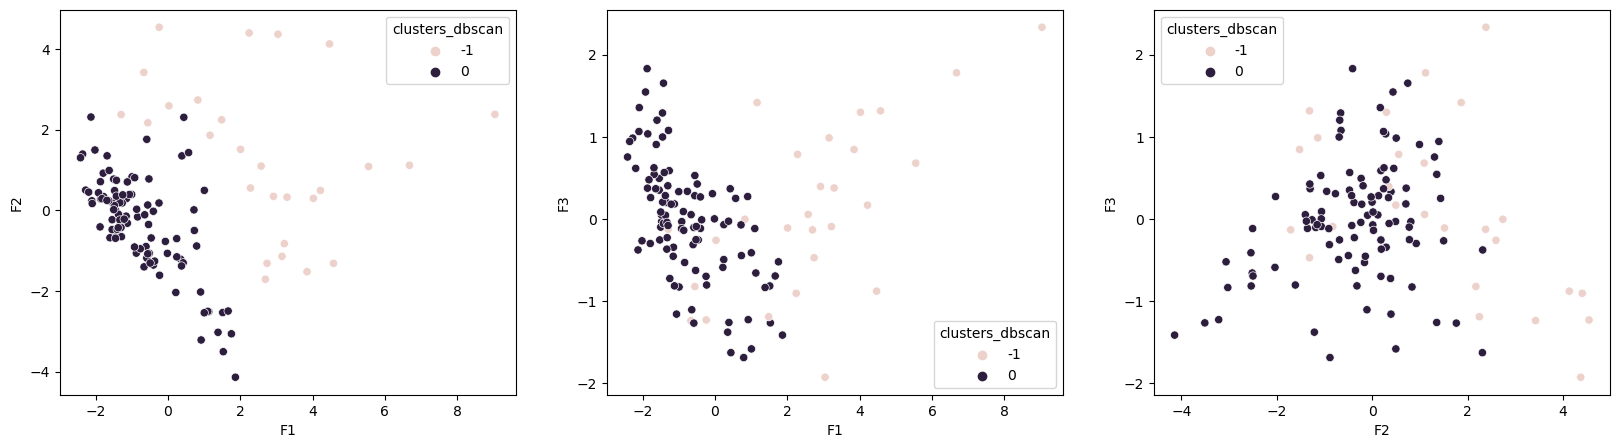

In [135]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df_projection3, x='F1', y='F2', hue='clusters_dbscan')
plt.subplot(1,3,2)
sns.scatterplot(data=df_projection3, x='F1', y='F3', hue='clusters_dbscan')
plt.subplot(1,3,3)
sns.scatterplot(data=df_projection3, x='F2', y='F3', hue='clusters_dbscan')

<AxesSubplot:xlabel='F2', ylabel='F3'>

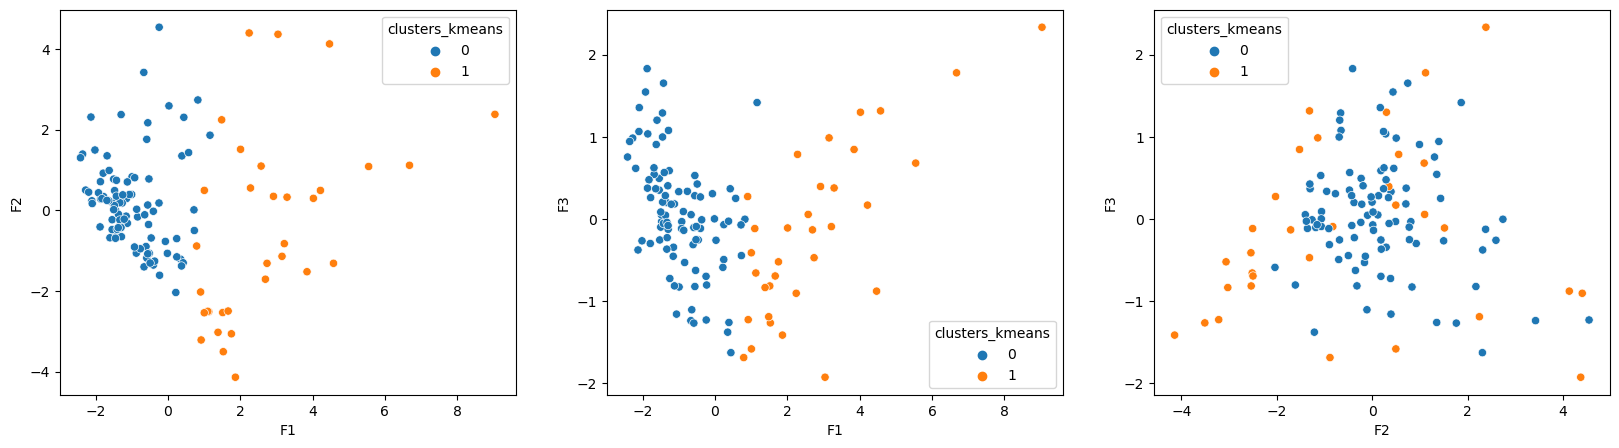

In [136]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df_projection3, x='F1', y='F2', hue='clusters_kmeans')
plt.subplot(1,3,2)
sns.scatterplot(data=df_projection3, x='F1', y='F3', hue='clusters_kmeans')
plt.subplot(1,3,3)
sns.scatterplot(data=df_projection3, x='F2', y='F3', hue='clusters_kmeans')

In [137]:
from sklearn.manifold import TSNE

In [138]:
tsne = TSNE(n_components=3)

In [139]:
df_tsne = pd.DataFrame(tsne.fit_transform(X_scaled), index=pays, columns=['F1', 'F2', 'F3'])

In [140]:
df_tsne['clusters_kmeans'] = clusters_kmeans

<AxesSubplot:xlabel='F2', ylabel='F3'>

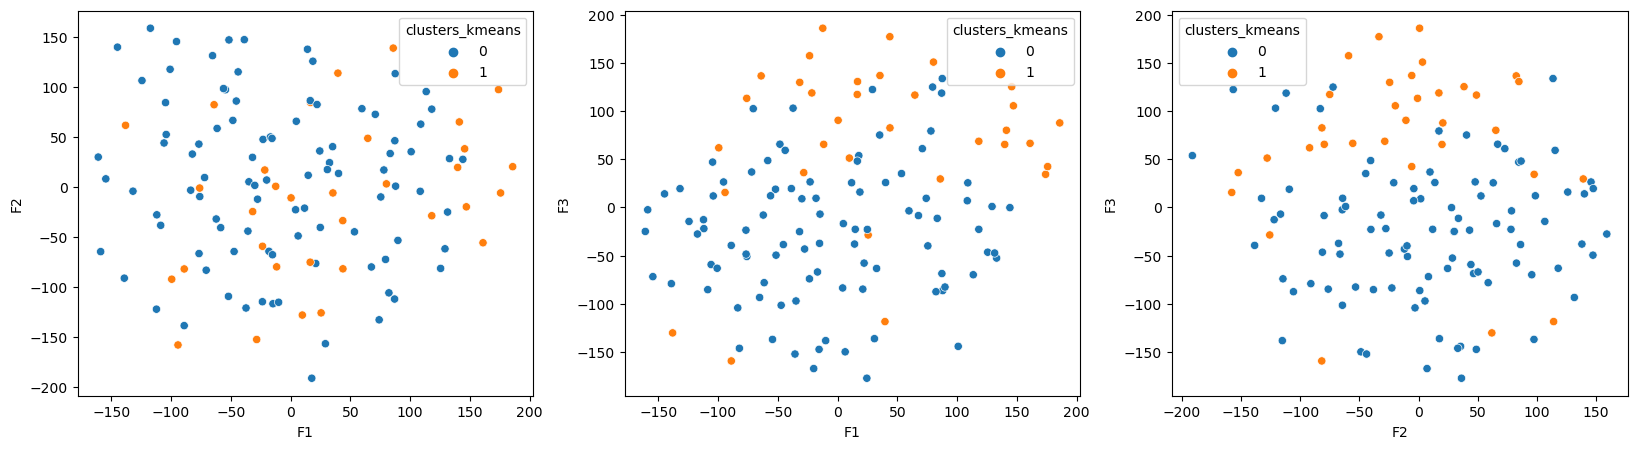

In [141]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.scatterplot(data=df_tsne, x='F1', y='F2', hue='clusters_kmeans')
plt.subplot(1,3,2)
sns.scatterplot(data=df_tsne, x='F1', y='F3', hue='clusters_kmeans')
plt.subplot(1,3,3)
sns.scatterplot(data=df_tsne, x='F2', y='F3', hue='clusters_kmeans')

In [142]:
from sklearn.manifold import Isomap

In [143]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(X_scaled)

clusters_kmeans = kmeans.labels_

In [144]:
isomap = Isomap(n_components=3)

In [145]:
df_isomap = pd.DataFrame(isomap.fit_transform(X_scaled), index=pays, columns=['F1', 'F2', 'F3'])
df_isomap['clusters_kmeans'] = clusters_kmeans

<AxesSubplot:xlabel='F2', ylabel='F3'>

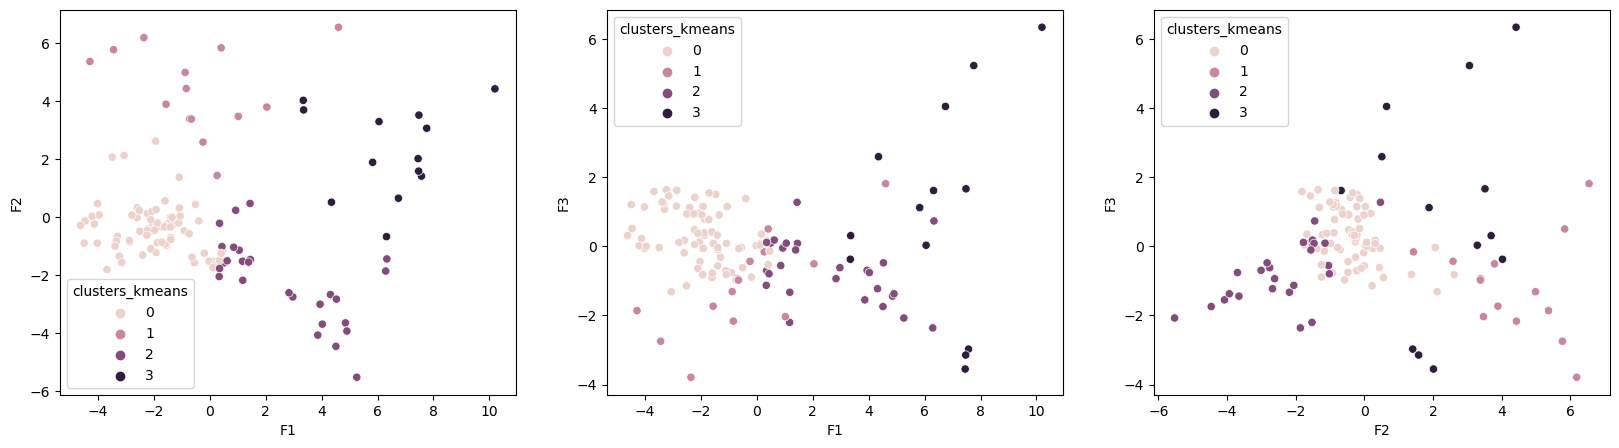

In [146]:
plt.figure(figsize=(20,5))

sns.color_palette(['red', 'green', 'blue', 'orange'])

plt.subplot(1,3,1)
sns.scatterplot(data=df_isomap, x='F1', y='F2', hue='clusters_kmeans')
plt.subplot(1,3,2)
sns.scatterplot(data=df_isomap, x='F1', y='F3', hue='clusters_kmeans')
plt.subplot(1,3,3)
sns.scatterplot(data=df_isomap, x='F2', y='F3', hue='clusters_kmeans')

In [149]:
kmeans.__dict__

{'n_clusters': 4,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'n_init': 10,
 'verbose': 0,
 'random_state': None,
 'copy_x': True,
 'algorithm': 'auto',
 'n_features_in_': 9,
 '_n_init': 10,
 '_tol': 0.0001,
 '_algorithm': 'elkan',
 '_n_threads': 8,
 'cluster_centers_': array([[-6.54588486e-01, -4.11262029e-01, -4.15725955e-01,
         -4.48488303e-01, -3.27291074e-01, -3.41309163e-01,
         -4.66996877e-01, -5.20195444e-01, -2.34581360e-01],
        [ 1.24116521e-03,  3.93937815e-01,  1.84353485e+00,
          5.56383903e-01,  3.30389249e-01,  2.12396396e+00,
         -8.69157082e-02, -5.16271801e-01, -1.04224357e+00],
        [ 1.02605737e+00, -7.36762455e-02, -3.14977218e-01,
         -1.71906958e-01, -2.02196100e-01, -4.28503590e-01,
          8.63171816e-01,  1.24477825e+00,  9.29416907e-01],
        [ 1.59374021e+00,  2.06980918e+00,  1.03527828e+00,
          2.31078828e+00,  1.92718344e+00,  5.45459964e-01,
          9.59149982e-01,  9.31788875e-01,  5.27398011